# About the Dataset
The dataset is from Tableau's sample data. It contains information about products, sales, and profits within a fictitious company from 2019 to 2022.

####**Features**
* **row_id** - unique ID for each row
* **order_id** - unique order ID for each customer
* **order_date** - date when the product is ordered
* **ship_date** - date when the product is shipped
* **ship_mode** - shipping mode specified by each customer
* **customer_id** - unique ID to identify each customer
* **customer_name** - name of the customer
* **segment** - segment where the customer belongs
* **country** - country of residence of the customer
* **city** - city of residence of the customer
* **state** - state of residence of the customer
* **postal_code** - postal code of every customer
* **region** - region where the customer belongs
* **product_id** - unique ID of the product
* **category** - category of the product ordered
* **sub_category** - sub-category of the product ordered
* **product_name** - name of the product
* **sales** - sales of the product
* **quantity** - quantity of the product
* **discount** - discount provided
* **profit** - profit or loss incurred
<br>

The key columns used in this analysis are *order_id*, *order_date*, *ship_mode*, *segment*, *state*, *region*, *product_id*, *category*, *sub_category*, *sales*, *quantity*, *discount*, and *profit*.

# Objectives
The aim is to forecast future sales for different regions to help with strategic planning, resource allocation, and optimizing inventory management. By understanding sales trends and predicting future sales, businesses can make data-driven decisions to maximize profits and minimize costs.

# Data Cleaning

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor

from IPython.display import Image

In [ ]:
# Format float numbers to be up to 2 decimals only
pd.options.display.float_format='{:,.2f}'.format

In [ ]:
df = pd.read_csv('(US) Sample - Superstore.csv')

In [ ]:
# Only including key columns
df = df[['order_id', 'order_date', 'ship_mode', 'segment', 'state', 'region',
    'product_id', 'category', 'sub_category', 'sales', 'quantity', 'discount',
    'profit']]

In [ ]:
df.head()

order_id order_date       ship_mode    segment       state region  \
0  CA-2021-152156    11/8/21    Second Class   Consumer    Kentucky  South   
1  CA-2021-152156    11/8/21    Second Class   Consumer    Kentucky  South   
2  CA-2021-138688    6/12/21    Second Class  Corporate  California   West   
3  US-2020-108966   10/11/20  Standard Class   Consumer     Florida  South   
4  US-2020-108966   10/11/20  Standard Class   Consumer     Florida  South   

        product_id         category sub_category  sales  quantity  discount  \
0  FUR-BO-10001798        Furniture    Bookcases 261.96         2      0.00   
1  FUR-CH-10000454        Furniture       Chairs 731.94         3      0.00   
2  OFF-LA-10000240  Office Supplies       Labels  14.62         2      0.00   
3  FUR-TA-10000577        Furniture       Tables 957.58         5      0.45   
4  OFF-ST-10000760  Office Supplies      Storage  22.37         2      0.20   

   profit  
0   41.91  
1  219.58  
2    6.87  
3 -383.03  
4    2.52

In [ ]:
df.tail()

order_id order_date       ship_mode   segment       state region  \
9989  CA-2019-110422    1/21/19    Second Class  Consumer     Florida  South   
9990  CA-2022-121258    2/26/22  Standard Class  Consumer  California   West   
9991  CA-2022-121258    2/26/22  Standard Class  Consumer  California   West   
9992  CA-2022-121258    2/26/22  Standard Class  Consumer  California   West   
9993  CA-2022-119914     5/4/22    Second Class  Consumer  California   West   

           product_id         category sub_category  sales  quantity  \
9989  FUR-FU-10001889        Furniture  Furnishings  25.25         3   
9990  FUR-FU-10000747        Furniture  Furnishings  91.96         2   
9991  TEC-PH-10003645       Technology       Phones 258.58         2   
9992  OFF-PA-10004041  Office Supplies        Paper  29.60         4   
9993  OFF-AP-10002684  Office Supplies   Appliances 243.16         2   

      discount  profit  
9989      0.20    4.10  
9990      0.00   15.63  
9991      0.20   19.39  
9992      0.00   13.32  
9993      0.00   72.95

In [ ]:
print(f'The dataset has {df.shape[1]} columns and {df.shape[0]} rows.')
print(f'Are there are any duplicated rows? {df.duplicated().values.any()}')
print(f'Are there null values? {df.isna().values.any()}')

The dataset has 13 columns and 9994 rows.
Are there are any duplicated rows? True
Are there null values? False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      9994 non-null   object 
 1   order_date    9994 non-null   object 
 2   ship_mode     9994 non-null   object 
 3   segment       9994 non-null   object 
 4   state         9994 non-null   object 
 5   region        9994 non-null   object 
 6   product_id    9994 non-null   object 
 7   category      9994 non-null   object 
 8   sub_category  9994 non-null   object 
 9   sales         9994 non-null   float64
 10  quantity      9994 non-null   int64  
 11  discount      9994 non-null   float64
 12  profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 1015.1+ KB


### Convert Data Type

In [ ]:
# Convert order_date column to datetime data tyype
df['order_date'] = pd.to_datetime(df['order_date'])
df['order_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9994 entries, 0 to 9993
Series name: order_date
Non-Null Count  Dtype         
--------------  -----         
9994 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 78.2 KB


<ipython-input-9-e790b8c4486b>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_date'] = pd.to_datetime(df['order_date'])


### Clean Duplicated Values

In [ ]:
df[df.duplicated()]

order_id order_date       ship_mode      segment state region  \
3406  US-2019-150119 2019-04-23  Standard Class  Home Office  Ohio   East   

           product_id   category sub_category  sales  quantity  discount  \
3406  FUR-CH-10002965  Furniture       Chairs 281.37         2      0.30   

      profit  
3406  -12.06

In [ ]:
df[(df['order_id'] == 'US-2019-150119') & (df['product_id'] == 'FUR-CH-10002965')]

order_id order_date       ship_mode      segment state region  \
3405  US-2019-150119 2019-04-23  Standard Class  Home Office  Ohio   East   
3406  US-2019-150119 2019-04-23  Standard Class  Home Office  Ohio   East   

           product_id   category sub_category  sales  quantity  discount  \
3405  FUR-CH-10002965  Furniture       Chairs 281.37         2      0.30   
3406  FUR-CH-10002965  Furniture       Chairs 281.37         2      0.30   

      profit  
3405  -12.06  
3406  -12.06

In [ ]:
df = df.drop(index=3405)

# Descriptive Statistics

In [ ]:
df.describe()

order_date     sales  quantity  discount    profit
count                           9993  9,993.00  9,993.00  9,993.00  9,993.00
mean   2021-04-30 07:03:30.747523072    229.85      3.79      0.16     28.66
min              2019-01-03 00:00:00      0.44      1.00      0.00 -6,599.98
25%              2020-05-23 00:00:00     17.28      2.00      0.00      1.73
50%              2021-06-26 00:00:00     54.48      3.00      0.20      8.67
75%              2022-05-14 00:00:00    209.94      5.00      0.20     29.36
max              2022-12-30 00:00:00 22,638.48     14.00      0.80  8,399.98
std                              NaN    623.28      2.23      0.21    234.27

In [ ]:
# Which states are under each region
region_state = df[['region', 'state']].groupby('region').agg({'state': 'value_counts'}).index

In [ ]:
region_dict = {'Central': [],
               'East': [],
               'South': [],
               'West': []}

for i in range(len(region_state)):
  if region_state[i][0] == 'Central':
    region_dict['Central'].append(region_state[i][1])
  elif region_state[i][0] == 'East':
    region_dict['East'].append(region_state[i][1])
  elif region_state[i][0] == 'South':
    region_dict['South'].append(region_state[i][1])
  else:
    region_dict['West'].append(region_state[i][1])

region_states = pd.DataFrame.from_dict(region_dict, orient='index')
region_states = region_states.transpose()
region_states

Central                  East           South        West
0          Texas              New York         Florida  California
1       Illinois          Pennsylvania  North Carolina  Washington
2       Michigan                  Ohio        Virginia     Arizona
3        Indiana         Massachusetts         Georgia    Colorado
4      Wisconsin            New Jersey       Tennessee      Oregon
5      Minnesota              Maryland        Kentucky        Utah
6       Oklahoma              Delaware         Alabama      Nevada
7       Missouri           Connecticut        Arkansas  New Mexico
8       Nebraska          Rhode Island     Mississippi       Idaho
9           Iowa         New Hampshire       Louisiana     Montana
10        Kansas               Vermont  South Carolina     Wyoming
11  South Dakota  District of Columbia            None        None
12  North Dakota                 Maine            None        None
13          None         West Virginia            None        None

In [ ]:
# Number of orders
num_of_orders = df.groupby('order_id').agg({'order_id': 'count'}).index
num_of_orders = len(num_of_orders)
print(f'The total number of orders is {num_of_orders}.')

The total number of orders is 5009.


In [ ]:
# Number of products
num_of_products = df.groupby('product_id').agg({'product_id': 'count'}).index
num_of_products = len(num_of_products)
print(f'The total number of products sold is {num_of_products}.')

The total number of products sold is 1862.


# Exploratory Data Analysis

In [ ]:
discrete_colors = ['#8de5ae', '#344469', '#bdeacb', '#41b8a4', '#a4e9bc',
                   '#29869b', '#69daa4', '#2c949c', '#74e4a9', '#acb4c3']

In [ ]:
# Sales trend over time
sales_over_time = df.groupby('order_date')['sales'].sum()
sales_over_time = sales_over_time.resample('M').sum()

fig = px.line(x=sales_over_time.index,
              y=sales_over_time.values,
              title='Sales Trend Over Time',
              markers=True)
fig.update_traces(line={'width': 3, 'color': discrete_colors[7]},
                  hovertemplate='%{x} <br>Sales=%{y}')
fig.update_layout(xaxis_title='Order Date',
                  yaxis_title='Sales ($)',
                  title_font_size=18)
fig.update_xaxes(minor=dict(ticks='inside', showgrid=True))
fig.show()

Sales decrease during the first months of the year and increase towards the end of the year.

In [ ]:
# Regional sales trend every 3 months for smoother lines
order_date_3ms = []
central = []
east = []
south = []
west = []

regions = ['Central', 'East', 'South', 'West']
for region in regions:
  data = df[df['region'] == region].groupby('order_date')['sales'].sum()
  data = data.resample('3MS').sum()

  for sales in data.values:
    if region == 'Central':
      central.append(sales)
    elif region == 'East':
      east.append(sales)
    elif region == 'South':
      south.append(sales)
    else:
      west.append(sales)

  if region == 'Central':
    for date in data.index:
      order_date_3ms.append(date)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=order_date_3ms, y=central, name='Central',
                         line=dict(color=discrete_colors[5], width=3)))
fig.add_trace(go.Scatter(x=order_date_3ms, y=east, name='East',
                         line=dict(color=discrete_colors[8], width=3)))
fig.add_trace(go.Scatter(x=order_date_3ms, y=south, name='South',
                         line=dict(color=discrete_colors[1], width=3)))
fig.add_trace(go.Scatter(x=order_date_3ms, y=west, name='West',
                         line=dict(color=discrete_colors[3], width=3)))
fig.update_layout(title='Sales Trend by Region',
                  title_font_size=18,
                  xaxis_title='Order Date',
                  yaxis_title='Sales ($)',
                  hovermode='x unified')
fig.show()

The southern region started with the highest sales in January 2019, however, it decreased relative to other regions throughout the years. Central and western regions have the same pattern, but the western region has higher sales. All regions except the southern region have lower sales during the first months of the year, as noted in the overall sales trend.

In [ ]:
# Sales distribution by region
regional_sales = df.groupby('region', as_index=False).agg({'sales': 'sum'})

bar = px.bar(regional_sales,
             x='region',
             y='sales',
             title='Sales Distribution by Region',
             color='sales',
             color_continuous_scale='tealgrn')
bar.update_layout(xaxis_title='Region',
                  yaxis_title='Sales ($)',
                  title_font_size=18,
                  coloraxis_showscale=False,
                  xaxis={'categoryorder': 'total descending'})
bar.show()

In [ ]:
# Sales distribution by segment
segment_sales = df.groupby('segment', as_index=False)['sales'].sum()

bar = px.bar(segment_sales,
             x='segment',
             y='sales',
             title='Sales Distribution by Segment',
             color='sales',
             color_continuous_scale='tealgrn')
bar.update_layout(xaxis_title='Segment',
                  yaxis_title='Sales ($)',
                  title_font_size=18,
                  coloraxis_showscale=False,
                  xaxis={'categoryorder': 'total descending'})
bar.show()

In [ ]:
# Sales distribution by ship mode
ship_mode_sales = df.groupby('ship_mode', as_index=False)['sales'].sum()

bar = px.bar(ship_mode_sales,
             x='ship_mode',
             y='sales',
             title='Sales Distribution by Ship Mode',
             color='sales',
             color_continuous_scale='tealgrn')
bar.update_layout(xaxis_title='Ship Mode',
                  yaxis_title='Sales ($)',
                  title_font_size=18,
                  coloraxis_showscale=False,
                  xaxis={'categoryorder': 'total descending'})
bar.show()

In [ ]:
# Sales by product category and sub-category
product_sales = df.groupby(['category', 'sub_category'], as_index=False).agg({'sales': 'sum'})

bar = px.bar(product_sales,
             x='sales',
             y='category',
             height=550,
             title='Sales by Product Category and Sub-Category',
             color='sub_category',
             color_discrete_sequence=discrete_colors)
bar.update_layout(xaxis_title='Sales ($)',
                  yaxis_title='Product Category',
                  title_font_size=18)
bar.show()

The product category, technology, has the most sales, and its sub-category, phones, has the most sales among all the sub-categories. The top 5 sub-categories are phones, chairs, storage, tables, and binders.

In [ ]:
# Sales and profit analysis
sales_over_time = df.groupby('order_date')['sales'].sum()
sales_over_time = sales_over_time.resample('M').sum()
sales = sales_over_time.values

order_date_m = sales_over_time.index

profit_over_time = df.groupby('order_date')['profit'].sum()
profit_over_time = profit_over_time.resample('M').sum()
profit = profit_over_time.values

fig = go.Figure()
fig.add_traces(go.Scatter(x=order_date_m, y=sales, name='Sales ($)', mode='markers+lines',
                          line=dict(color=discrete_colors[8], width=3)))
fig.add_traces(go.Scatter(x=order_date_m, y=profit, name='Profit ($)', mode='markers+lines',
                          line=dict(color=discrete_colors[7], width=3)))
fig.update_layout(title='Sales and Profit Analysis',
                  title_font_size=18,
                  xaxis_title='Order Date',
                  hovermode='x unified')
fig.show()

There are a few months where the profit did not increase or decrease compared to sales. Relatively, profit and sales increase and decrease at the same time, however, there are no spikes in increases in profit compared to sales. From August 2022, the profit stagnated compared to sales.

In [ ]:
# Sales and discount analysis
sales = df['sales'].tolist()
discount = df['discount'].tolist()

fig = go.Figure(data=go.Scatter(
    x=sales,
    y=discount,
    mode='markers',
    marker=dict(size=7, color=discrete_colors[7])
))
fig.update_layout(title='Sales and Discount Analysis',
                  title_font_size=18,
                  xaxis_title='Sales (%)',
                  yaxis_title='Discount (%)')
fig.show()

Having a higher discount does not result in higher sales.

# Correlation Analysis

In [ ]:
df.head()

order_id order_date       ship_mode    segment       state region  \
0  CA-2021-152156 2021-11-08    Second Class   Consumer    Kentucky  South   
1  CA-2021-152156 2021-11-08    Second Class   Consumer    Kentucky  South   
2  CA-2021-138688 2021-06-12    Second Class  Corporate  California   West   
3  US-2020-108966 2020-10-11  Standard Class   Consumer     Florida  South   
4  US-2020-108966 2020-10-11  Standard Class   Consumer     Florida  South   

        product_id         category sub_category  sales  quantity  discount  \
0  FUR-BO-10001798        Furniture    Bookcases 261.96         2      0.00   
1  FUR-CH-10000454        Furniture       Chairs 731.94         3      0.00   
2  OFF-LA-10000240  Office Supplies       Labels  14.62         2      0.00   
3  FUR-TA-10000577        Furniture       Tables 957.58         5      0.45   
4  OFF-ST-10000760  Office Supplies      Storage  22.37         2      0.20   

   profit  
0   41.91  
1  219.58  
2    6.87  
3 -383.03  
4    2.52

In [ ]:
# Correlation matrix
df_corr = df.drop(['order_id', 'state', 'product_id'], axis=1)

df_corr['year'] = df['order_date'].dt.year
df_corr['month'] = df['order_date'].dt.month
df_corr['day'] = df['order_date'].dt.day

df_corr['region_encoded'] = df['region'].astype('category').cat.codes
df_corr['ship_mode_encoded'] = df['ship_mode'].astype('category').cat.codes
df_corr['segment_encoded'] = df['segment'].astype('category').cat.codes
df_corr['category_encoded'] = df['category'].astype('category').cat.codes
df_corr['sub_category_encoded'] = df['sub_category'].astype('category').cat.codes

In [ ]:
print(df_corr[['region', 'region_encoded']].value_counts())
print(df_corr[['ship_mode', 'ship_mode_encoded']].value_counts())
print(df_corr[['segment', 'segment_encoded']].value_counts())
print(df_corr[['category', 'category_encoded']].value_counts())
print(df_corr[['sub_category', 'sub_category_encoded']].value_counts())

region   region_encoded
West     3                 3203
East     1                 2847
Central  0                 2323
South    2                 1620
Name: count, dtype: int64
ship_mode       ship_mode_encoded
Standard Class  3                    5967
Second Class    2                    1945
First Class     0                    1538
Same Day        1                     543
Name: count, dtype: int64
segment      segment_encoded
Consumer     0                  5191
Corporate    1                  3020
Home Office  2                  1782
Name: count, dtype: int64
category         category_encoded
Office Supplies  1                   6026
Furniture        0                   2120
Technology       2                   1847
Name: count, dtype: int64
sub_category  sub_category_encoded
Binders       3                       1523
Paper         12                      1370
Furnishings   9                        957
Phones        13                       889
Storage       14                   

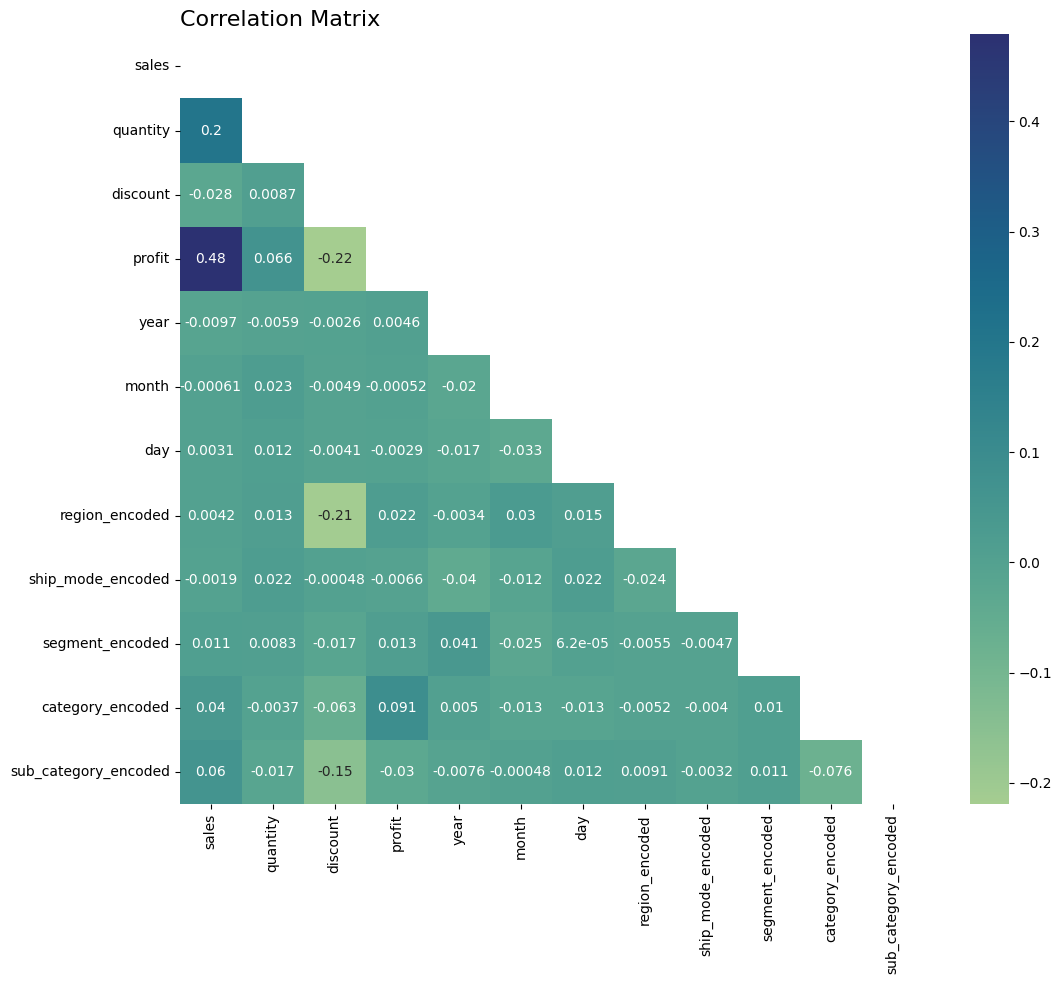

In [ ]:
corr = df_corr.corr(numeric_only=True)
matrix = np.triu(corr)

plt.figure(figsize=(12, 10))
plt.title('Correlation Matrix', loc='left', fontsize=16)
sns.heatmap(data=corr, annot=True, cmap='crest', mask=matrix)
plt.show()

Sales and profit have a positive relationship, which means that if sales increase, profit increases. Sales also have a positive relationship with quantities sold, but this relationship is weak. It is comprehensible that when there are more orders, there will be higher sales. Sales have little to no relationship with different regions and shipping modes and have a weak positive relationship with customer segments, product categories, and sub-categories.

Discount has a negative relationship with sales and profit. The higher the discounts, the lower the sales and profit. The discounts provided to lower encoded regions, the central and east regions, are higher than the other regions.

The order date has little to no relationship with the other variables.

# Multivariable Regression Analysis

Training data will be 80% of the total data, and the rest will be the testing data.

After testing linear, polynomial, and ridge regression, using ridge regression is found to be more appropriate to address the overfitting of training data. It is also best to manually test which interaction features are better for the model instead of using polynomial degrees. Since we are dealing with time-series data, it is best not to use logarithmic regression. However, log(sales) is used in the ridge regression to get a better-fit model.

Different models are created per region since different interaction features affect the sales per region.

There is a pattern in the residuals plot for all the region models. So only models with equal or more than 50% r-squared, low root mean square error (RMSE), and features with less than 5 variance inflation factor (VIF) are considered to validate that the model is still fit to forecast sales.

Manipulate the code below to see the results per region.

In [ ]:
lags = [1, 7, 14, 30, 60, 90, 180, 365]
categories = ['ship_mode_encoded', 'segment_encoded', 'category_encoded',
              'sub_category_encoded']
date_features = ['day_of_week', 'month', 'week_of_year', 'quarter',
                 'rolling_mean_7', 'rolling_mean_30']

### Ridge Regression Function

To get the result for a specific region, only un-comment the features under this particular region.

In [ ]:
def ridge_regr():
  # For West region:
  features = daily_sales.drop(['sales', 'region', 'region_encoded', 'discount',
                               'ship_mode_encoded', 'sub_category_encoded',
                               'category_encoded', 'segment_encoded',
                               'lag_7', 'lag_14', 'lag_180', 'lag_365']
                              + date_features, axis=1)

  # For South region:
  # features = daily_sales.drop(['sales', 'region', 'region_encoded',
  #                              'ship_mode_encoded', 'category_encoded',
  #                              'sub_category_encoded', 'segment_encoded',
  #                              'month', 'quarter', 'rolling_mean_30',
  #                              'rolling_mean_7', 'week_of_year', 'lag_1', 'lag_7',
  #                              'lag_14', 'lag_60', 'lag_30'], axis=1)

  # For East region:
  # features = daily_sales.drop(['sales', 'region', 'region_encoded',
  #                              'segment_encoded', 'category_encoded',
  #                              'ship_mode_encoded', 'sub_category_encoded',
  #                              'month', 'quarter', 'rolling_mean_7',
  #                              'rolling_mean_30', 'week_of_year','day_of_week',
  #                              'lag_90', 'lag_30', 'lag_180'], axis=1)

  # For Central region:
  # features = daily_sales.drop(['sales', 'region', 'region_encoded',
  #                              'ship_mode_encoded', 'category_encoded',
  #                              'sub_category_encoded', 'segment_encoded',
  #                              'lag_1', 'lag_30'] + date_features, axis=1)

  target = daily_sales['sales']

  X_train, X_test, y_train, y_test = train_test_split(features,
                                                      target,
                                                      test_size=0.2,
                                                      random_state=42)

  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  ridge = Ridge()
  ridge.fit(X_train_scaled, y_train)

  y_train_pred = ridge.predict(X_train_scaled)
  y_test_pred = ridge.predict(X_test_scaled)

  train_r2 = ridge.score(X_train_scaled, y_train)
  test_r2 = r2_score(y_test, y_test_pred)
  train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
  test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

  coef = ridge.coef_
  train_residuals = y_train - y_train_pred
  test_residuals = y_test - y_test_pred

  return train_r2, test_r2, train_rmse, test_rmse, X_train, y_train, coef, y_train_pred, y_test_pred, train_residuals, test_residuals, y_test

### Calculate R-squared and RMSE

To get the result for a specific region, make sure to type the desired region under this code,
```
region_data = for_regr[for_regr['region'] == 'Region Name']
```
and to only un-comment the high VIF features under this particular region.

The four regions are West, South, East, and Central.

In [ ]:
for_regr = df_corr.drop(['ship_mode', 'segment', 'category', 'sub_category',
                        'year', 'month', 'day', 'profit'], axis=1)

# Filter for which region to model
region_data = for_regr[for_regr['region'] == 'West']
daily_sales = region_data.groupby(pd.Grouper(key='order_date', freq='1D')).sum()

daily_sales['sales'] = np.log1p(daily_sales['sales'])

for lag in lags:
  daily_sales[f'lag_{lag}'] = daily_sales['sales'].shift(lag)

# Date features columns
daily_sales['rolling_mean_7'] = daily_sales['sales'].rolling(window=7).mean().shift(1)
daily_sales['rolling_mean_30'] = daily_sales['sales'].rolling(window=30).mean().shift(1)
daily_sales['day_of_week'] = daily_sales.index.dayofweek
daily_sales['month'] = daily_sales.index.month
daily_sales['quarter'] = daily_sales.index.quarter
daily_sales['week_of_year'] = daily_sales.index.isocalendar().week
daily_sales['week_of_year'] = daily_sales['week_of_year'].astype('int')

daily_sales.dropna(inplace=True)

initial_r2 = ridge_regr()
train_r2_initial = initial_r2[0]
test_r2_initial = initial_r2[1]

# Interaction features
for lag in lags:
  # Lag features and categories
  for category in categories:
    listed = category.split('_')[:-1]
    category_name = '_'.join(listed)
    daily_sales[f'lag_{lag}_{category_name}'] = daily_sales[f'lag_{lag}'] * daily_sales[category]
    column_name = f'lag_{lag}_{category_name}'
    r2 = ridge_regr()
    train_r2 = r2[0]
    test_r2 = r2[1]

    # High VIF for WEST Region:
    if column_name == 'lag_365_ship_mode':
      daily_sales = daily_sales.drop(column_name, axis=1)
    if column_name == 'lag_180_segment':
      daily_sales = daily_sales.drop(column_name, axis=1)

    # High VIF for SOUTH Region:
    # if column_name == 'lag_90_segment':
    #   daily_sales = daily_sales.drop(column_name, axis=1)

    # High VIF for EAST Region:
    # if column_name == 'lag_7_ship_mode':
    #   daily_sales = daily_sales.drop(column_name, axis=1)
    # if column_name == 'lag_1_category':
    #   daily_sales = daily_sales.drop(column_name, axis=1)
    # if column_name == 'lag_90_ship_mode':
    #   daily_sales = daily_sales.drop(column_name, axis=1)

    # High VIF for CENTRAL Region:
    # if column_name == 'lag_30_sub_category':
    #   daily_sales = daily_sales.drop(column_name, axis=1)

    if train_r2 > train_r2_initial + 0.0009:
      if test_r2 >= test_r2_initial:
        train_r2_initial = train_r2
        test_r2_initial = test_r2
      else:
        daily_sales = daily_sales.drop(column_name, axis=1)
    else:
      daily_sales = daily_sales.drop(column_name, axis=1)

  # Lag features and date features
  for date in date_features:
    daily_sales[f'lag_{lag}_{date}'] = daily_sales[f'lag_{lag}'] * daily_sales[date]
    column_name = f'lag_{lag}_{date}'
    r2 = ridge_regr()
    train_r2 = r2[0]
    test_r2 = r2[1]

    if train_r2 > train_r2_initial + 0.0009:
      if test_r2 >= test_r2_initial:
        train_r2_initial = train_r2
        test_r2_initial = test_r2
      else:
        daily_sales = daily_sales.drop(column_name, axis=1)
    else:
      daily_sales = daily_sales.drop(column_name, axis=1)

# Categories and date features
for date in date_features:
  # Lag features and categories
  for category in categories:
    listed = category.split('_')[:-1]
    category_name = '_'.join(listed)
    daily_sales[f'{date}_{category_name}'] = daily_sales[date] * daily_sales[category]
    column_name = f'{date}_{category_name}'
    r2 = ridge_regr()
    train_r2 = r2[0]
    test_r2 = r2[1]

    if train_r2 > train_r2_initial + 0.0009:
      if test_r2 >= test_r2_initial:
        train_r2_initial = train_r2
        test_r2_initial = test_r2
      else:
        daily_sales = daily_sales.drop(column_name, axis=1)
    else:
      daily_sales = daily_sales.drop(column_name, axis=1)

# Higher order features
for lag in lags:
  for date in date_features:
    for category in categories:
      listed = category.split('_')[:-1]
      category_name = '_'.join(listed)
      daily_sales[f'lag_{lag}_{date}_{category_name}'] = daily_sales[f'lag_{lag}'] * daily_sales[date] * daily_sales[category]
      column_name = f'lag_{lag}_{date}_{category_name}'
      r2 = ridge_regr()
      train_r2 = r2[0]
      test_r2 = r2[1]

      # High VIF for WEST Region:
      if column_name == 'lag_7_month_ship_mode':
        daily_sales = daily_sales.drop(column_name, axis=1)
      if column_name == 'lag_60_quarter_sub_category':
        daily_sales = daily_sales.drop(column_name, axis=1)

      # High VIF for SOUTH Region:
      # if column_name == 'lag_90_day_of_week_segment':
      #   daily_sales = daily_sales.drop(column_name, axis=1)

      # High VIF for EAST Region:
      # if column_name == 'lag_30_rolling_mean_7_category':
      #   daily_sales = daily_sales.drop(column_name, axis=1)
      # if column_name == 'lag_30_month_category':
      #   daily_sales = daily_sales.drop(column_name, axis=1)
      # if column_name == 'lag_7_rolling_mean_30_ship_mode':
      #   daily_sales = daily_sales.drop(column_name, axis=1)

      # High VIF for CENTRAL Region:
      # if column_name == 'lag_1_day_of_week_category':
      #   daily_sales = daily_sales.drop(column_name, axis=1)

      if train_r2 > train_r2_initial + 0.0009:
        if test_r2 >= test_r2_initial:
          train_r2_initial = train_r2
          test_r2_initial = test_r2
        else:
          daily_sales = daily_sales.drop(column_name, axis=1)
      else:
        daily_sales = daily_sales.drop(column_name, axis=1)

daily_sales.dropna(inplace=True)

print(f'Training data r-squared: {train_r2_initial}')
print(f'Testing data r-squared: {test_r2_initial}')
print(f'Training data RMSE: {ridge_regr()[2]}')
print(f'Testing data RMSE: {ridge_regr()[3]}')

Training data r-squared: 0.6284986272610453
Testing data r-squared: 0.5931970269315217
Training data RMSE: 1.993104158703865
Testing data RMSE: 2.0865445243073295


#### Results per region:

West region r-squared and RMSE:


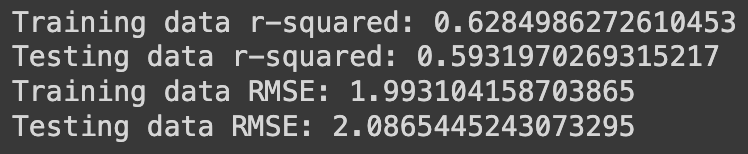

South region r-squared and RMSE:


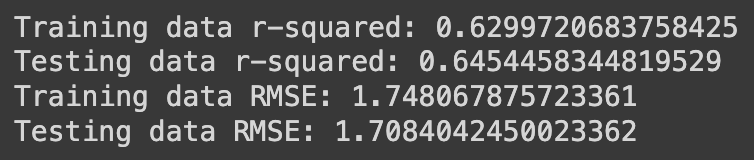

East region r-squared and RMSE:


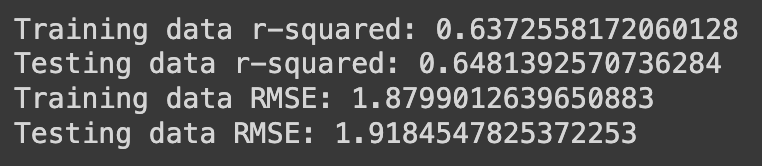

Central region r-squared and RMSE:


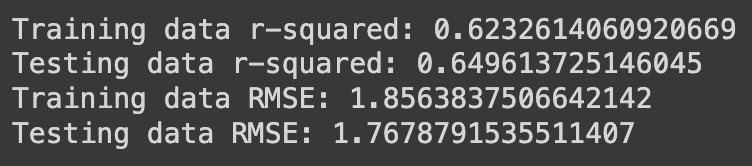

In [ ]:
print('West region r-squared and RMSE:')
display(Image("west_r2_rmse.png", width=350, height=70))
print('South region r-squared and RMSE:')
display(Image("south_r2_rmse.png", width=350, height=70))
print('East region r-squared and RMSE:')
display(Image("east_r2_rmse.png", width=350, height=70))
print('Central region r-squared and RMSE:')
display(Image("central_r2_rmse.png", width=350, height=70))

### Test Features for its VIF

To get the result for a specific region, only un-comment the features under this particular region.

In [ ]:
# For West region:
for_vif = daily_sales.drop(['sales', 'region', 'region_encoded', 'discount',
                            'ship_mode_encoded', 'sub_category_encoded',
                            'category_encoded', 'segment_encoded',
                            'lag_7', 'lag_14', 'lag_180', 'lag_365']
                          + date_features, axis=1)

# For South region:
# for_vif = daily_sales.drop(['sales', 'region', 'region_encoded',
#                             'ship_mode_encoded', 'category_encoded',
#                             'sub_category_encoded', 'segment_encoded',
#                             'month', 'quarter', 'rolling_mean_30',
#                             'rolling_mean_7', 'week_of_year', 'lag_1', 'lag_7',
#                             'lag_14', 'lag_60', 'lag_30'], axis=1)

# For East region:
# for_vif = daily_sales.drop(['sales', 'region', 'region_encoded',
#                             'segment_encoded', 'category_encoded',
#                             'ship_mode_encoded', 'sub_category_encoded',
#                             'month', 'quarter', 'rolling_mean_7',
#                             'rolling_mean_30', 'week_of_year','day_of_week',
#                             'lag_90', 'lag_30', 'lag_180'], axis=1)

# For Central region:
# for_vif = daily_sales.drop(['sales', 'region', 'region_encoded',
#                             'ship_mode_encoded', 'category_encoded',
#                             'sub_category_encoded', 'segment_encoded',
#                             'lag_1', 'lag_30'] + date_features, axis=1)

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = for_vif.columns

vif_values = []
for i in range(for_vif.shape[1]):
    vif_value = variance_inflation_factor(for_vif.values, i)
    vif_values.append(vif_value)

vif_data["VIF"] = vif_values

print(vif_data)

                feature  VIF
0              quantity 4.53
1                 lag_1 2.11
2                lag_30 1.99
3                lag_60 2.53
4                lag_90 1.94
5           lag_7_month 2.37
6        lag_14_segment 1.99
7    lag_14_day_of_week 2.05
8   lag_60_sub_category 2.98
9     lag_180_ship_mode 2.69
10        lag_180_month 2.57


#### Results per region:

West region features and its VIF:


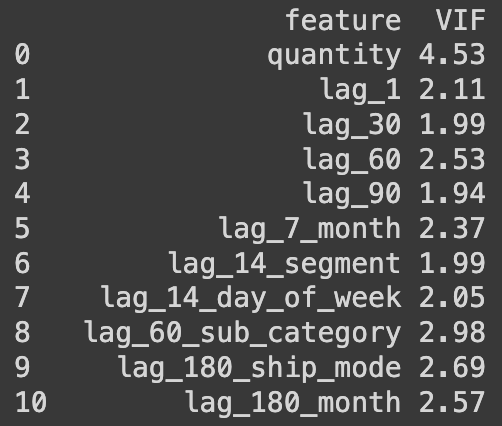

South region features and its VIF:


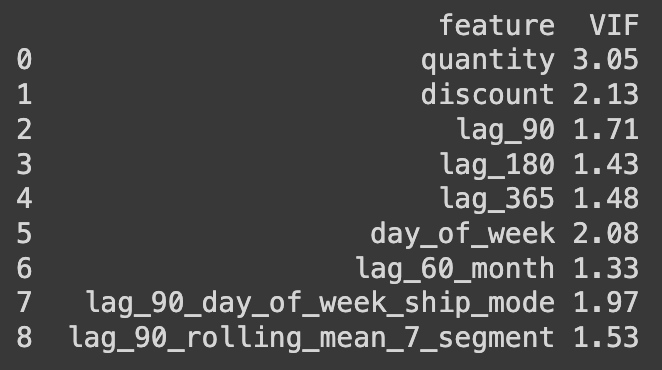

East region features and its VIF:


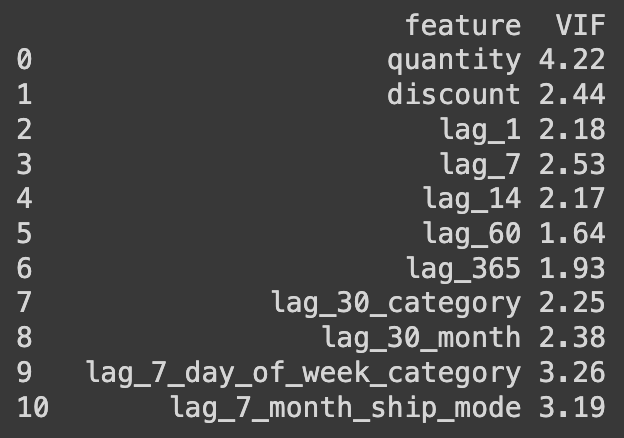

Central region features and its VIF:


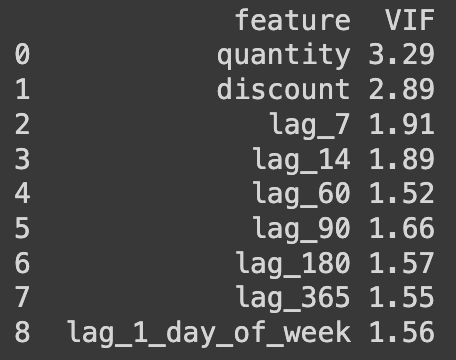

In [ ]:
print('West region features and its VIF:')
display(Image("west_vif.png", width=200, height=170))
print('South region features and its VIF:')
display(Image("south_vif.png", width=250, height=150))
print('East region features and its VIF:')
display(Image("east_vif.png", width=250, height=170))
print('Central region features and its VIF:')
display(Image("central_vif.png", width=200, height=150))

### Regression Coefficients

In [ ]:
X_train = ridge_regr()[4]
y_train = ridge_regr()[5]
coef = ridge_regr()[6]
y_train_pred = ridge_regr()[7]
y_test_pred = ridge_regr()[8]
train_residuals = ridge_regr()[9]
test_residuals = ridge_regr()[10]
y_test = ridge_regr()[11]

In [ ]:
regr_coef = pd.DataFrame(data=coef, index=X_train.columns, columns=['Coefficient'])
regr_coef

Coefficient
quantity                    1.86
lag_1                      -0.04
lag_30                     -0.02
lag_60                     -0.24
lag_90                     -0.11
lag_7_month                 0.31
lag_14_segment              0.07
lag_14_day_of_week          0.21
lag_60_sub_category         0.23
lag_180_ship_mode           0.37
lag_180_month              -0.26

#### Results per region:

West region features' coefficients:


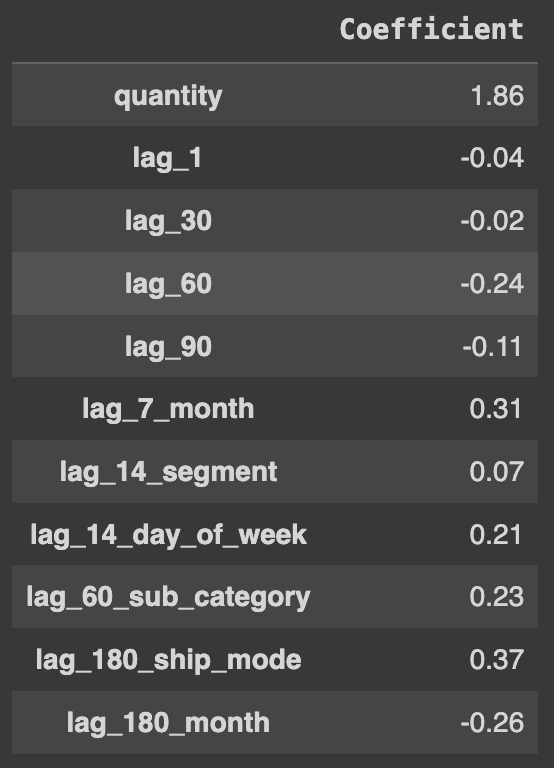

South region features' coefficients:


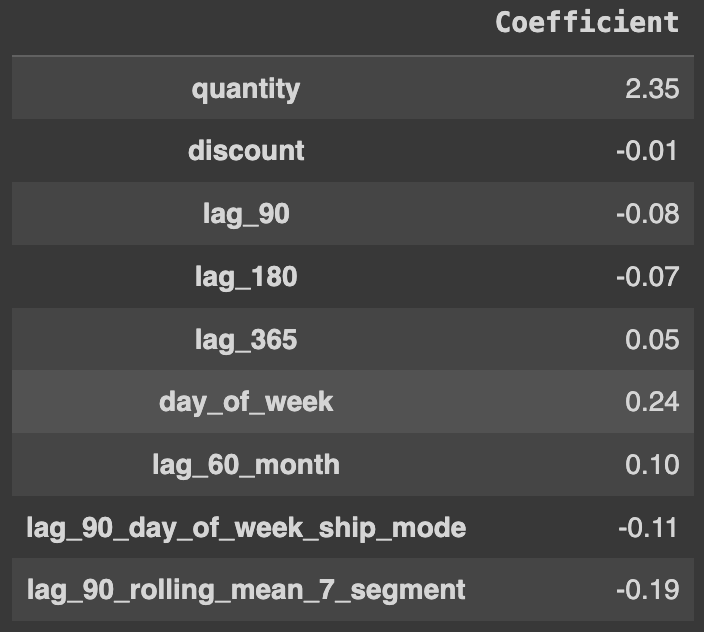

East region features' coefficients:


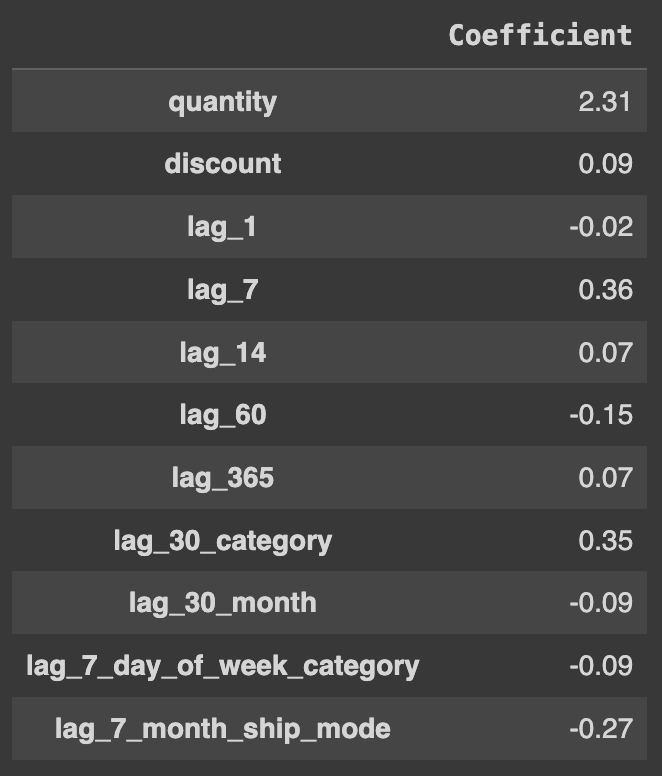

Central region features' coefficients:


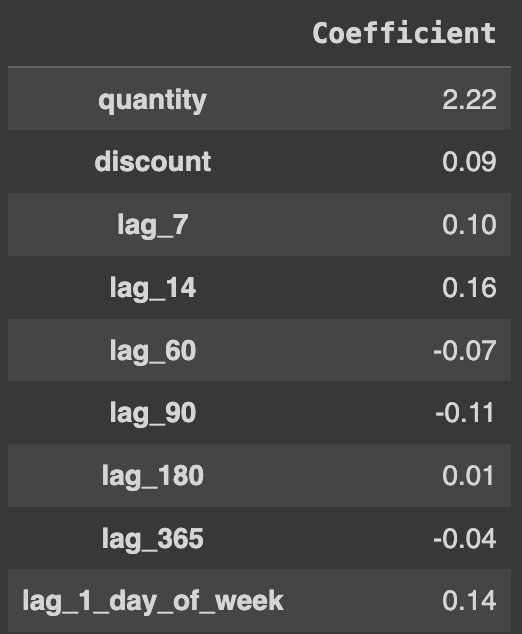

In [ ]:
print("West region features' coefficients:")
display(Image("west_coef.png", width=190, height=250))
print("South region features' coefficients:")
display(Image("south_coef.png", width=250, height=230))
print("East region features' coefficients:")
display(Image("east_coef.png", width=230, height=260))
print("Central region features' coefficients:")
display(Image("central_coef.png", width=190, height=230))

Here are the features and their relationship with the sales per region, assuming all other variables remain constant:

*Sales increases or decreases by the amount stated under the 'Coefficient' column in the dataframes above.*

**For the West region,**
<br>
has a positive relationship with sales:
* quantities sold
* sales from 7 days ago depending on each additional month
* sales from 14 days ago within the same customer segment
* sales from 14 days ago depending on the day of the week
* sales from 60 days ago within the same sub-category
* sales from 180 days ago within the same shipping mode

has a negative relationship with sales:
* sales from 1, 30, 60, and 90 days ago
* sales from 180 days ago depending on each additional month
<br><br>

**For the South region,**
<br>
has a positive relationship with sales:
* quantities sold
* sales from 365 days ago
* sales depending on the day of the week
* sales from 60 days ago depending on each additional month

has a negative relationship with sales:
* discounts
* sales from 90 and 180 days ago
* sales from 90 days ago within the same shipping mode depending on the day of the week
* average sales of the past 7 days from 90 days ago within the same segment
<br><br>

**For the East region,**
<br>
has a positive relationship with sales:
* quantities sold
* discounts
* sales from 7, 14, and 365 days ago
* sales from 30 days ago within the same category

has a negative relationship with sales:
* sales from 1 and 60 days ago
* sales from 30 days ago depending on each additional month
* sales from 7 days ago within the same category depending on the day of the week
* sales from 7 days ago within the same shipping mode depending on each additional month
<br><br>

**For the Central region,**
<br>
has a positive relationship with sales:
* quantities sold
* discounts
* sales from 7, 14, and 180 days ago
* sales from a day ago depending on the day of the week

has a negative relationship with sales:
* sales from 60, 90, and 365 days ago


### Analyse the Estimated Values & Regression Residuals of the Training Data

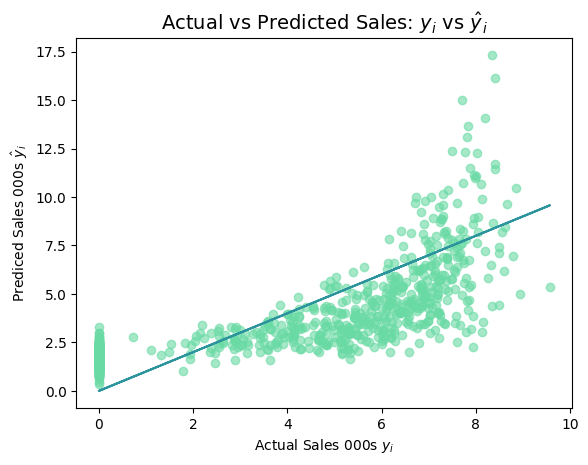

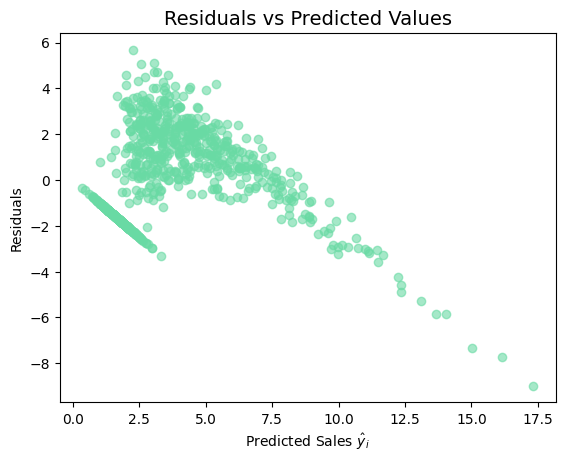

In [ ]:
# Actual vs. Predicted Sales
plt.figure(dpi=100)
plt.scatter(x=y_train, y=y_train_pred, c=discrete_colors[6], alpha=0.6)
plt.plot(y_train, y_train, color=discrete_colors[7])
plt.title(f'Actual vs Predicted Sales: $y _i$ vs $\hat y_i$', fontsize=14)
plt.xlabel('Actual Sales 000s $y _i$')
plt.ylabel('Prediced Sales 000s $\hat y _i$')
plt.show()

# Residuals vs Predicted Values
plt.figure(dpi=100)
plt.scatter(x=y_train_pred, y=train_residuals, c=discrete_colors[6], alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=14)
plt.xlabel('Predicted Sales $\hat y _i$')
plt.ylabel('Residuals')
plt.show()

#### Results per region:

West region Actual vs. Predicted Sales:


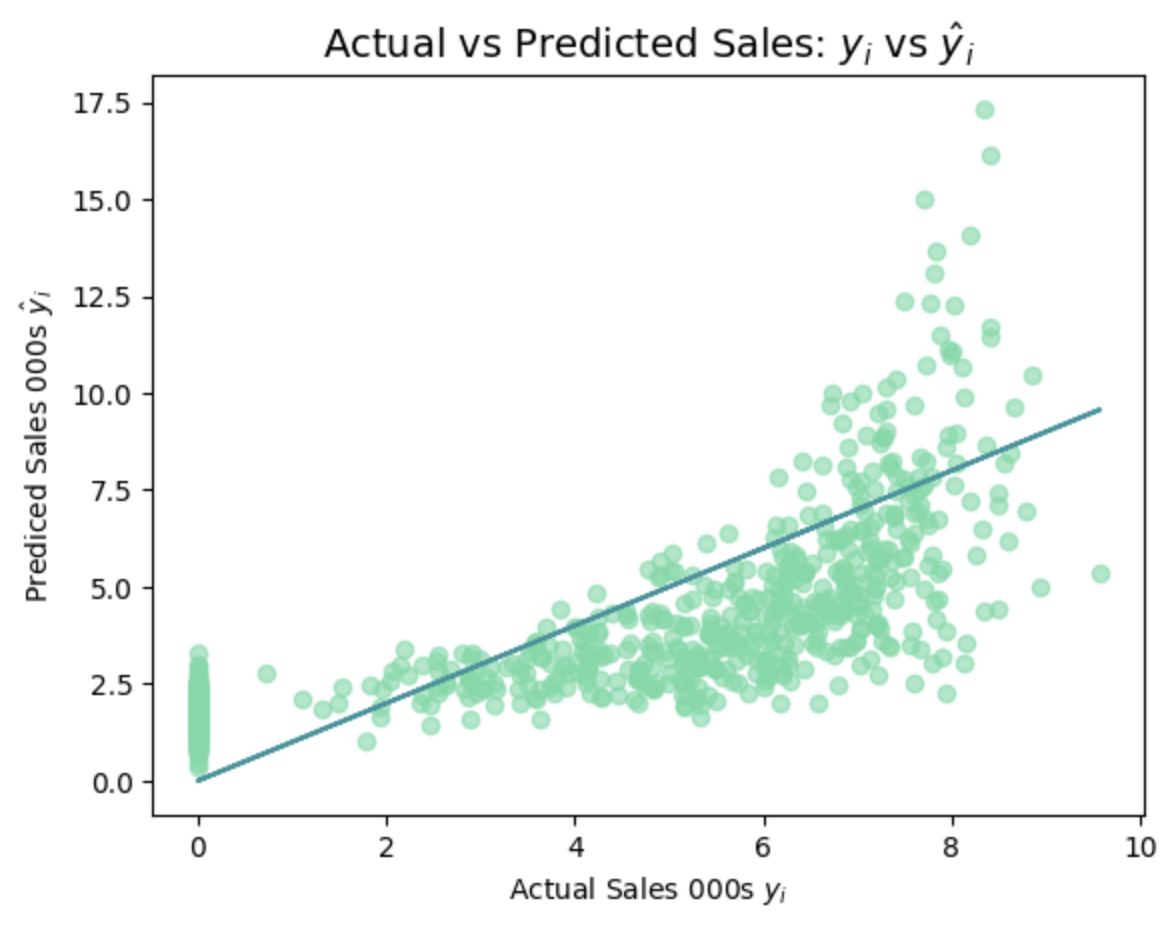

South region Actual vs. Predicted Sales:


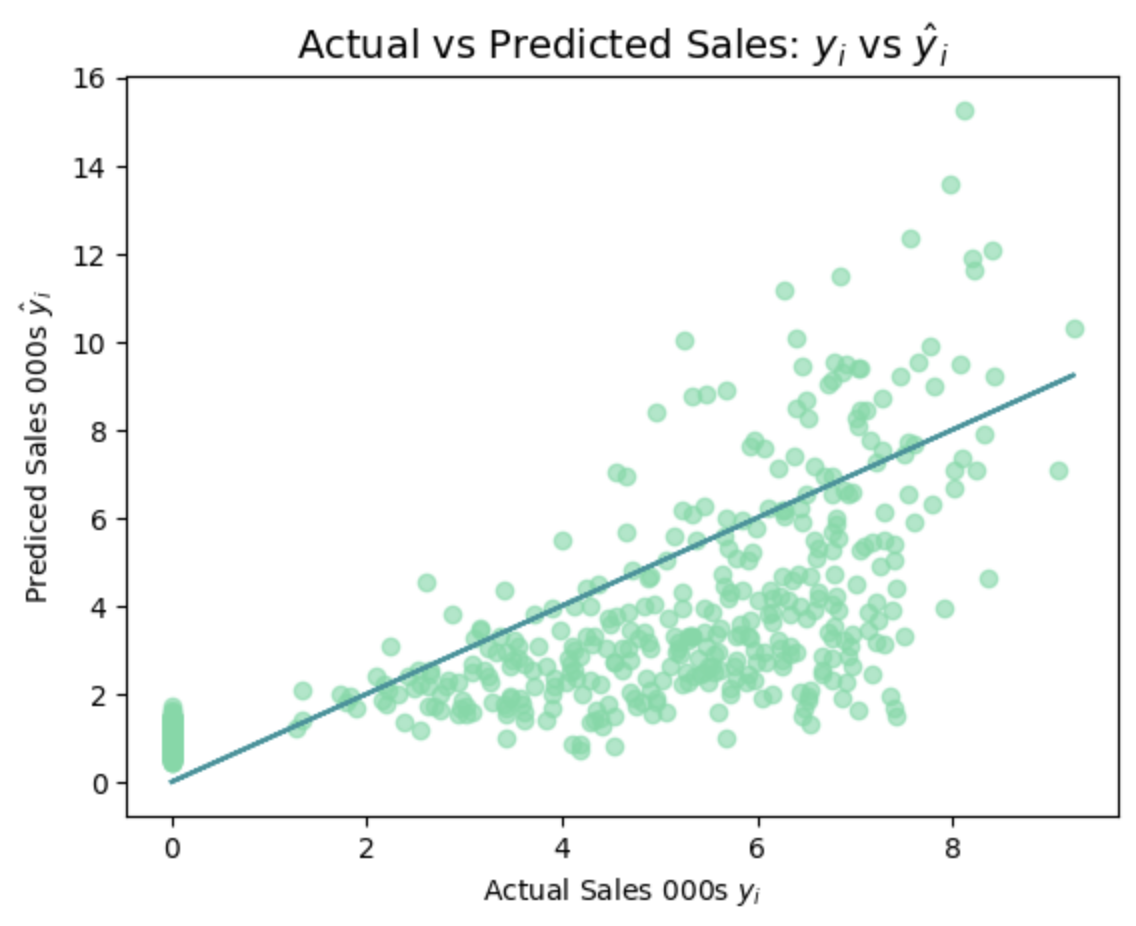

East region Actual vs. Predicted Sales:


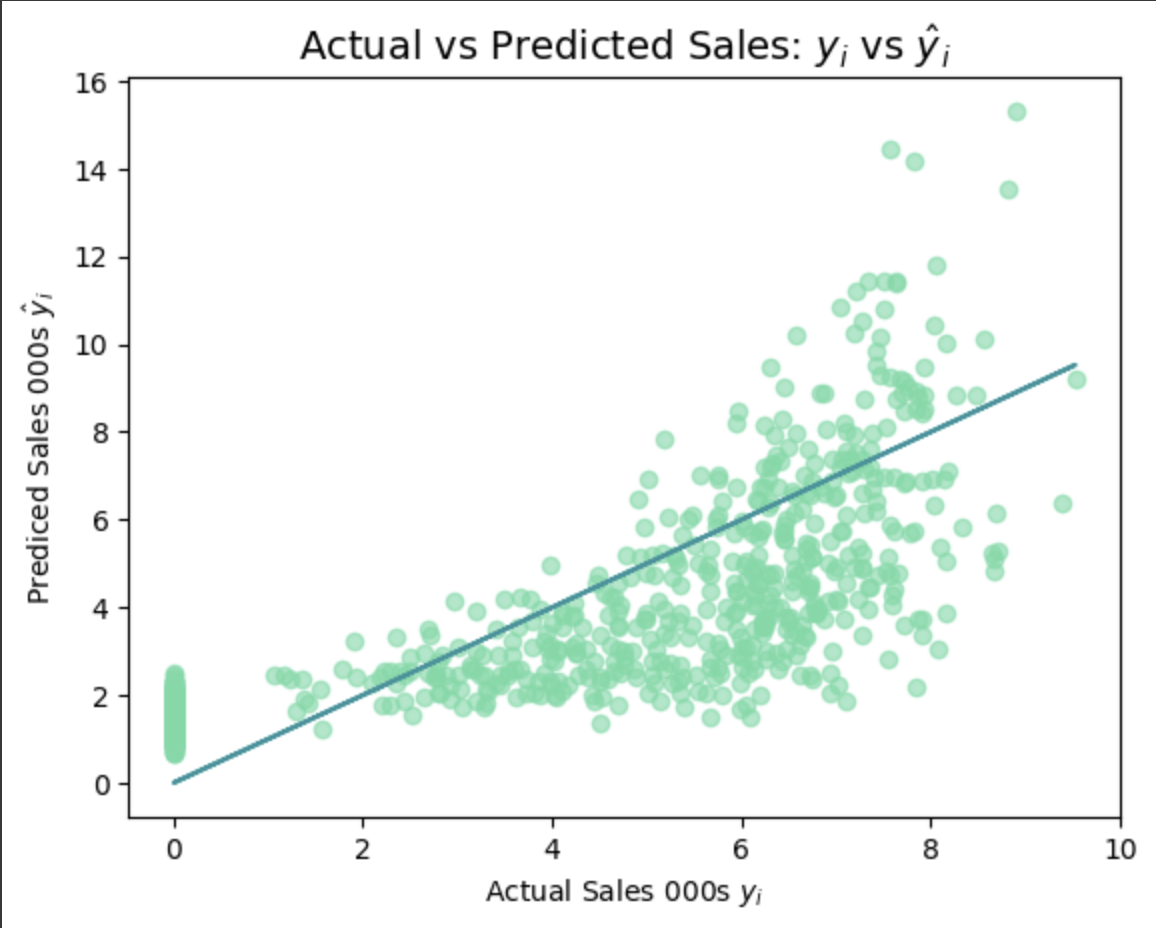

Central region Actual vs. Predicted Sales:


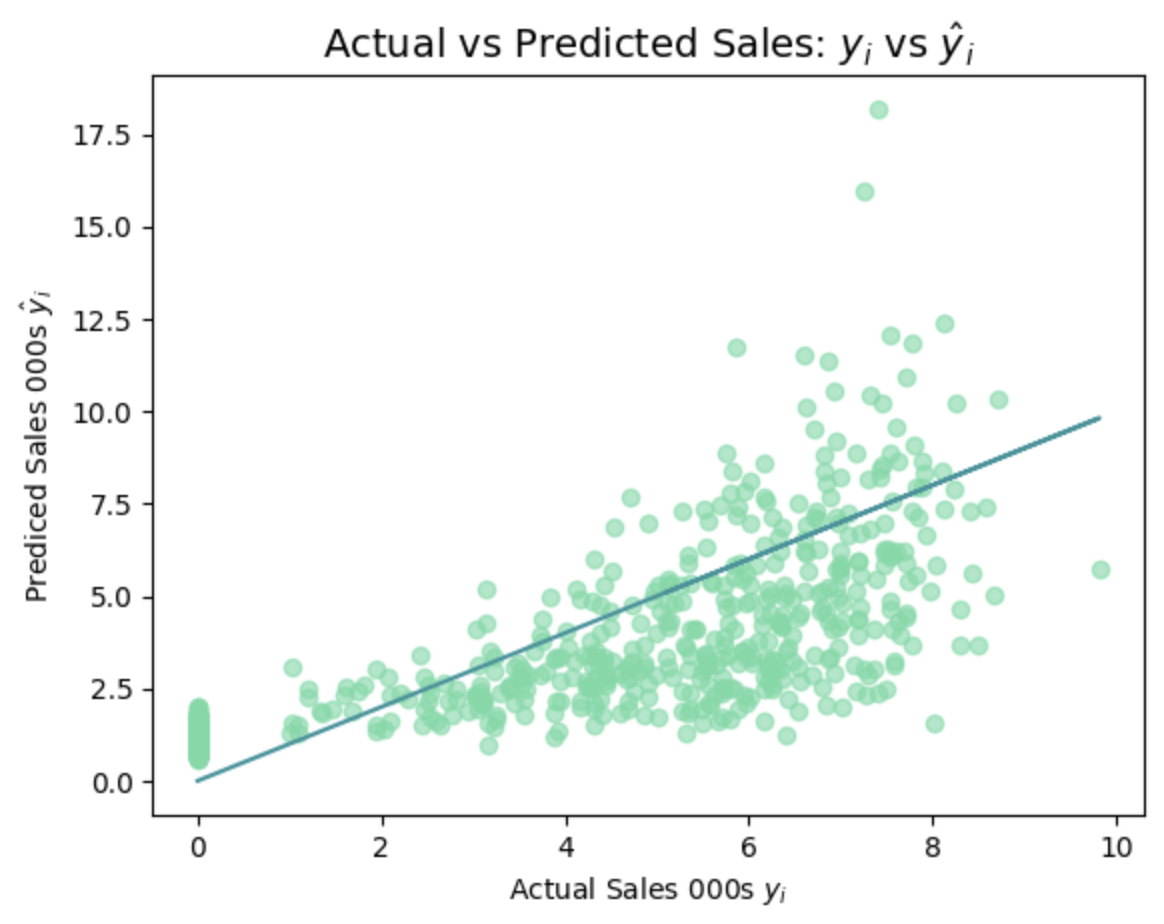

In [ ]:
print('West region Actual vs. Predicted Sales:')
display(Image("west_actual_vs_pred.png", width=370, height=300))
print('South region Actual vs. Predicted Sales:')
display(Image("south_actual_vs_pred.png", width=370, height=300))
print('East region Actual vs. Predicted Sales:')
display(Image("east_actual_vs_pred.png", width=370, height=300))
print('Central region Actual vs. Predicted Sales:')
display(Image("central_actual_vs_pred.png", width=370, height=300))

West region Residual vs. Predicted Values:


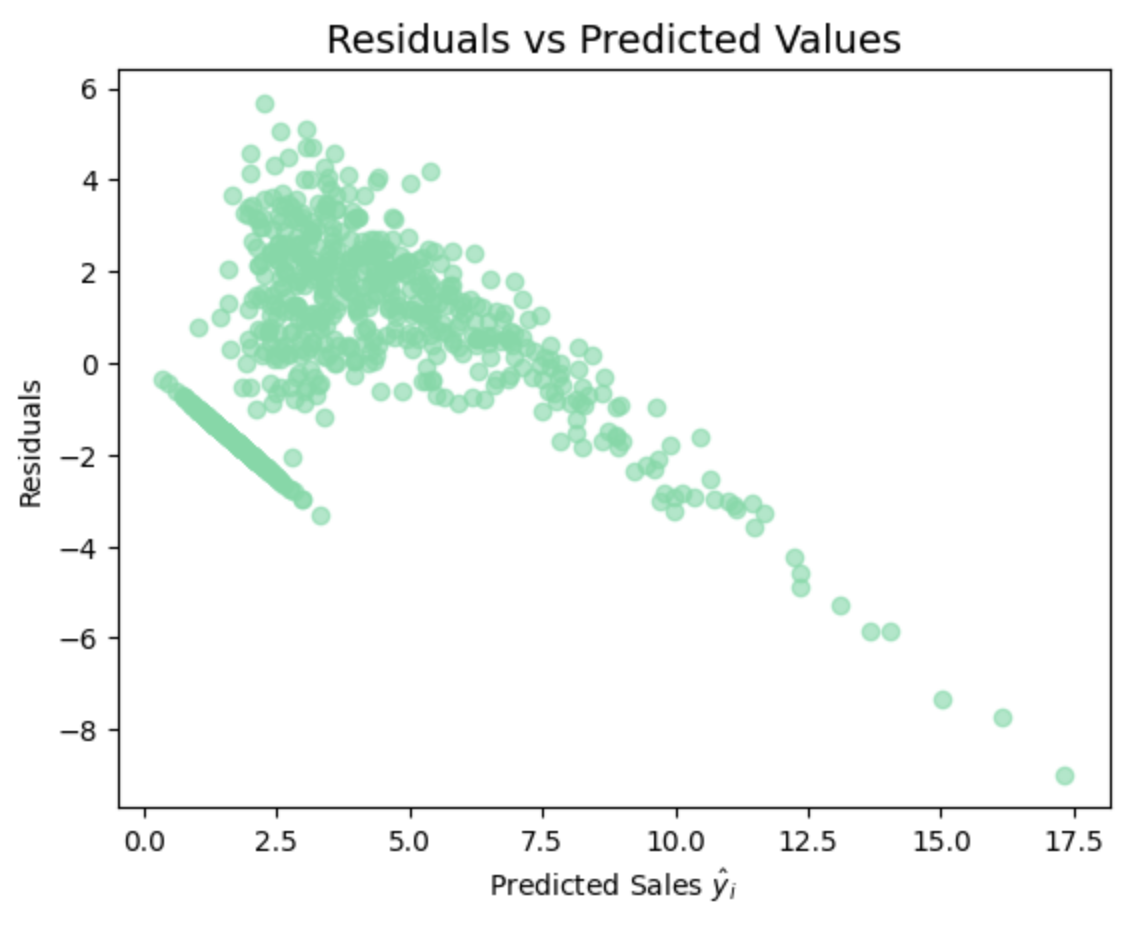

South region Residual vs. Predicted Values:


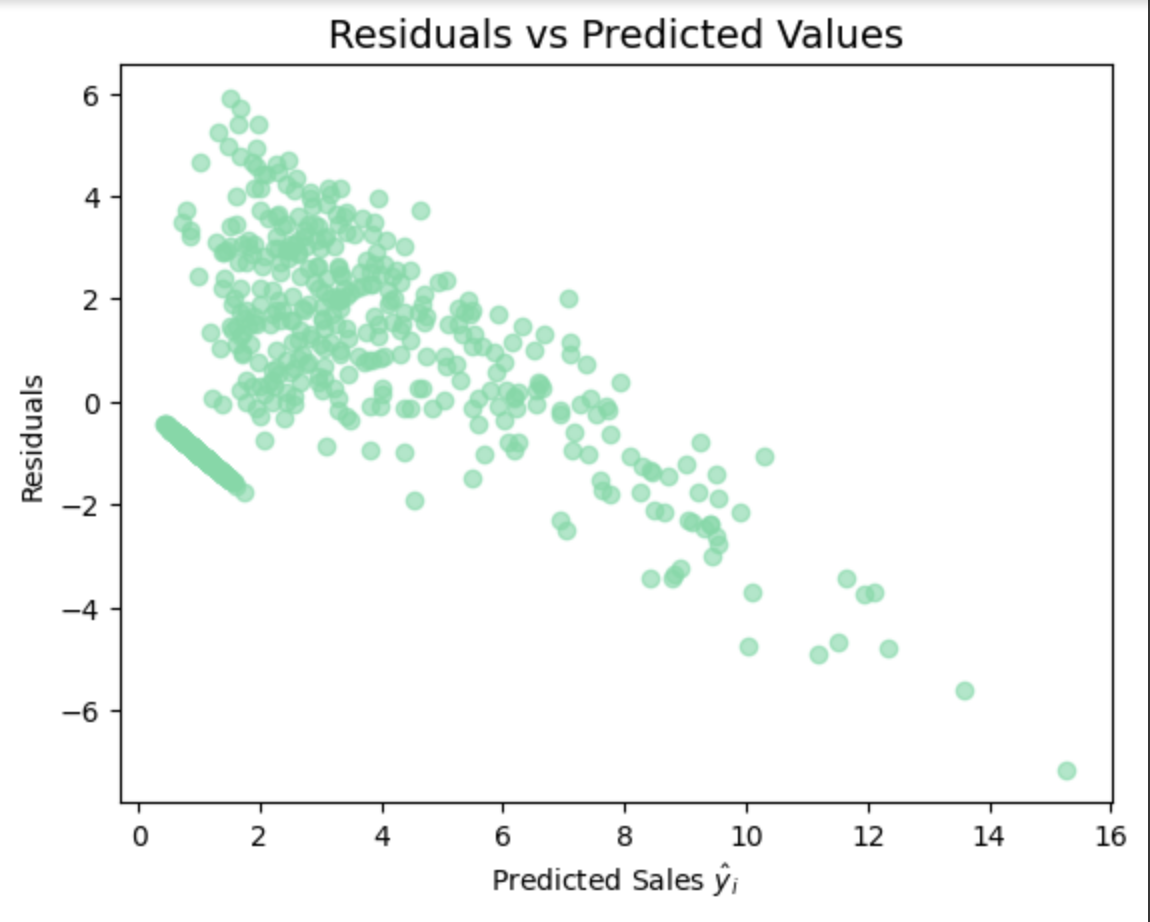

East region Residual vs. Predicted Values:


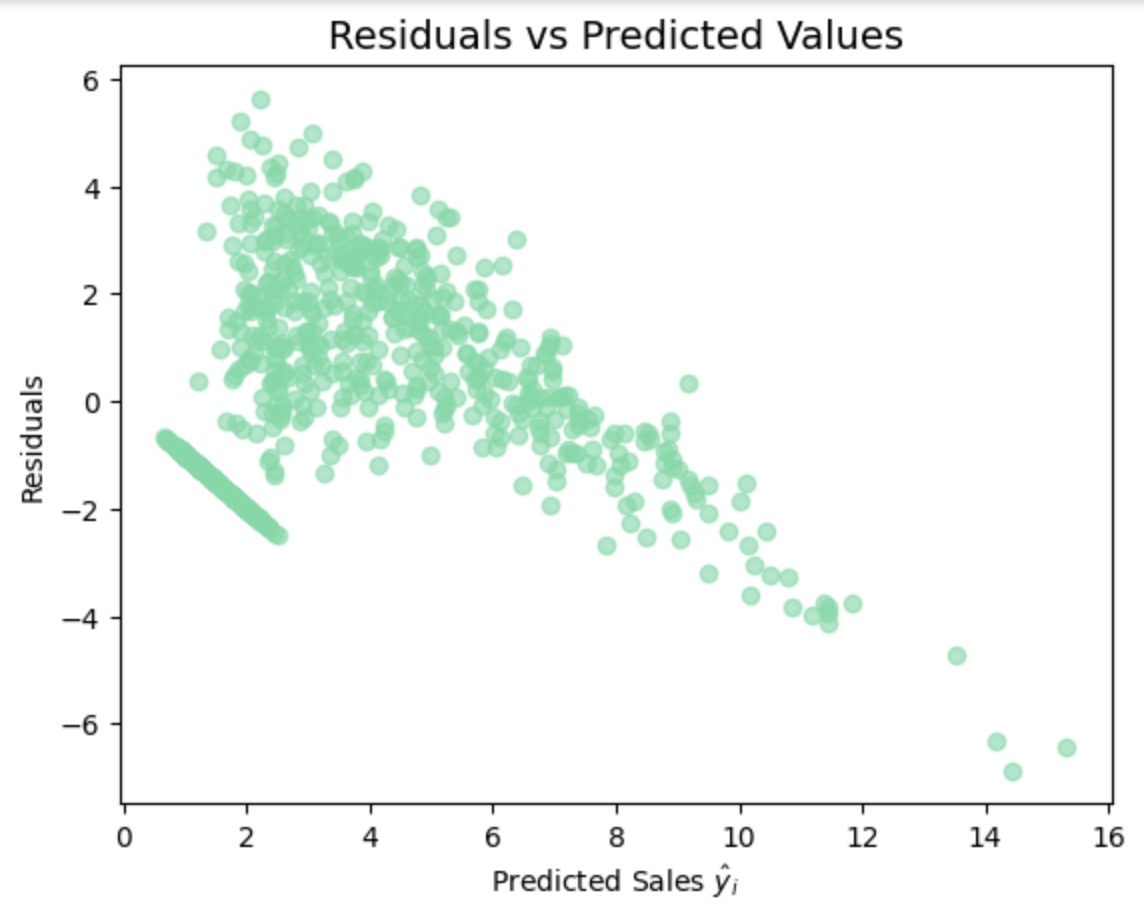

Central region Residual vs. Predicted Values:


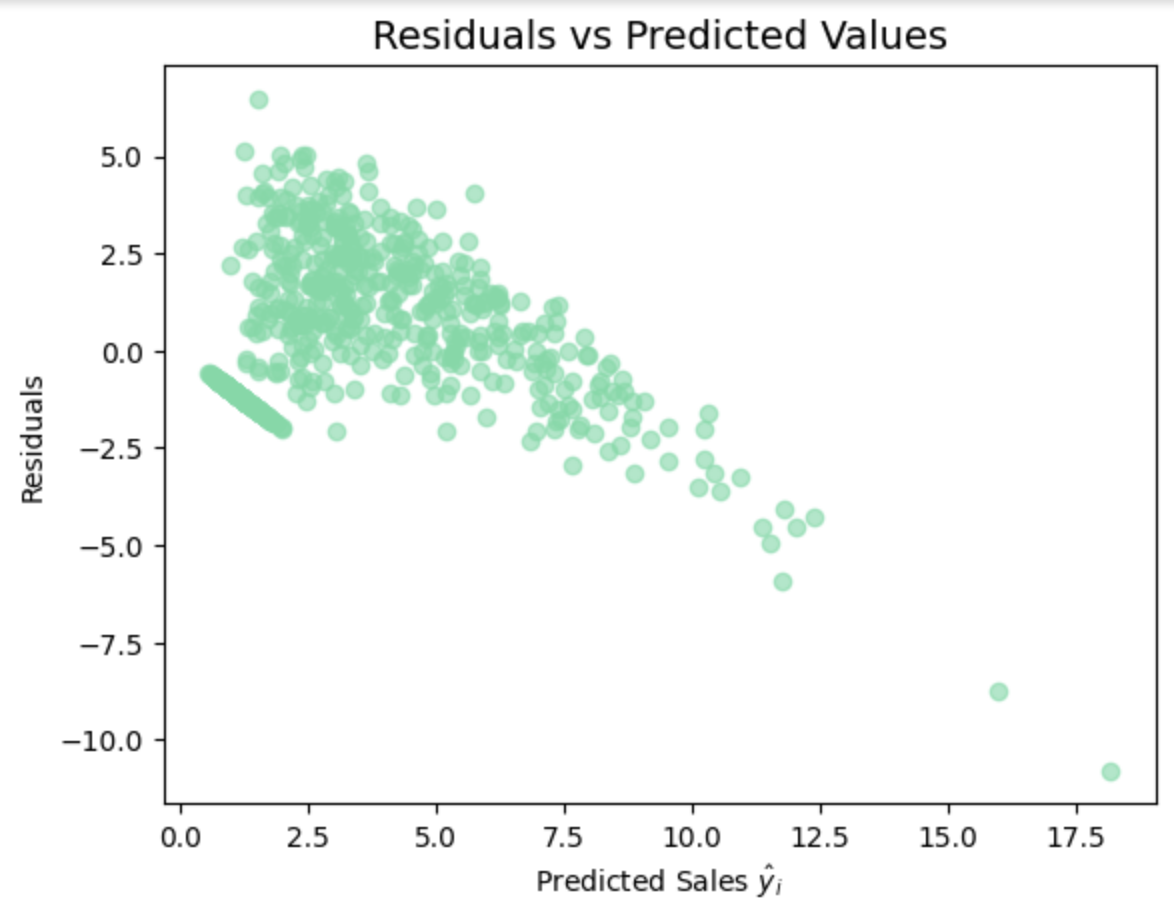

In [ ]:
print('West region Residual vs. Predicted Values:')
display(Image("west_resid_vs_pred.png", width=370, height=300))
print('South region Residual vs. Predicted Values:')
display(Image("south_resid_vs_pred.png", width=370, height=300))
print('East region Residual vs. Predicted Values:')
display(Image("east_resid_vs_pred.png", width=370, height=300))
print('Central region Residual vs. Predicted Values:')
display(Image("central_resid_vs_pred.png", width=370, height=300))

### Residual Distribution Chart

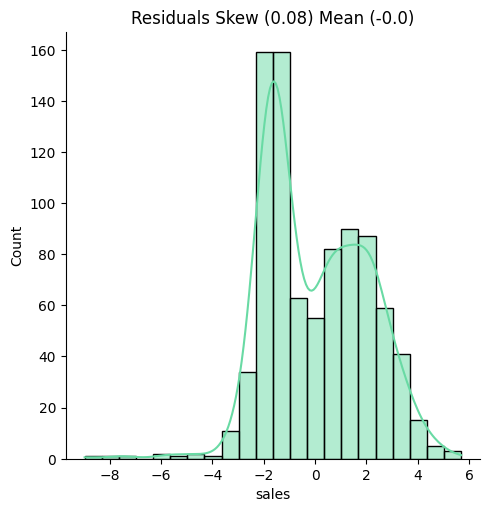

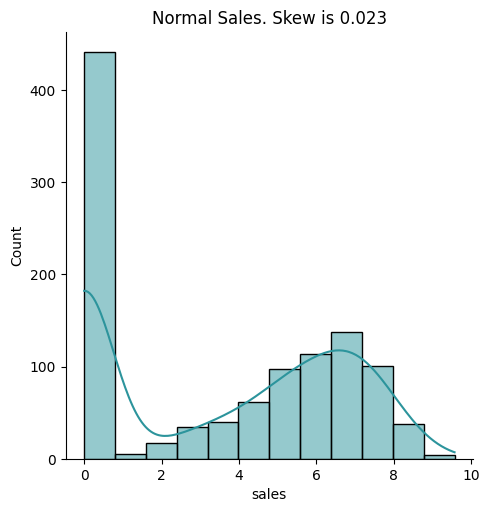

In [ ]:
# Residual Distribution Chart
resid_mean = round(train_residuals.mean(), 2)
resid_skew = round(train_residuals.skew(), 2)

sns.displot(train_residuals, kde=True, color=discrete_colors[6])
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

tgt_skew = daily_sales['sales'].skew()
sns.displot(daily_sales['sales'], kde='kde', color=discrete_colors[7])
plt.title(f'Normal Sales. Skew is {tgt_skew:.3}')
plt.show()

#### Results per region:

West region Residual Skew:


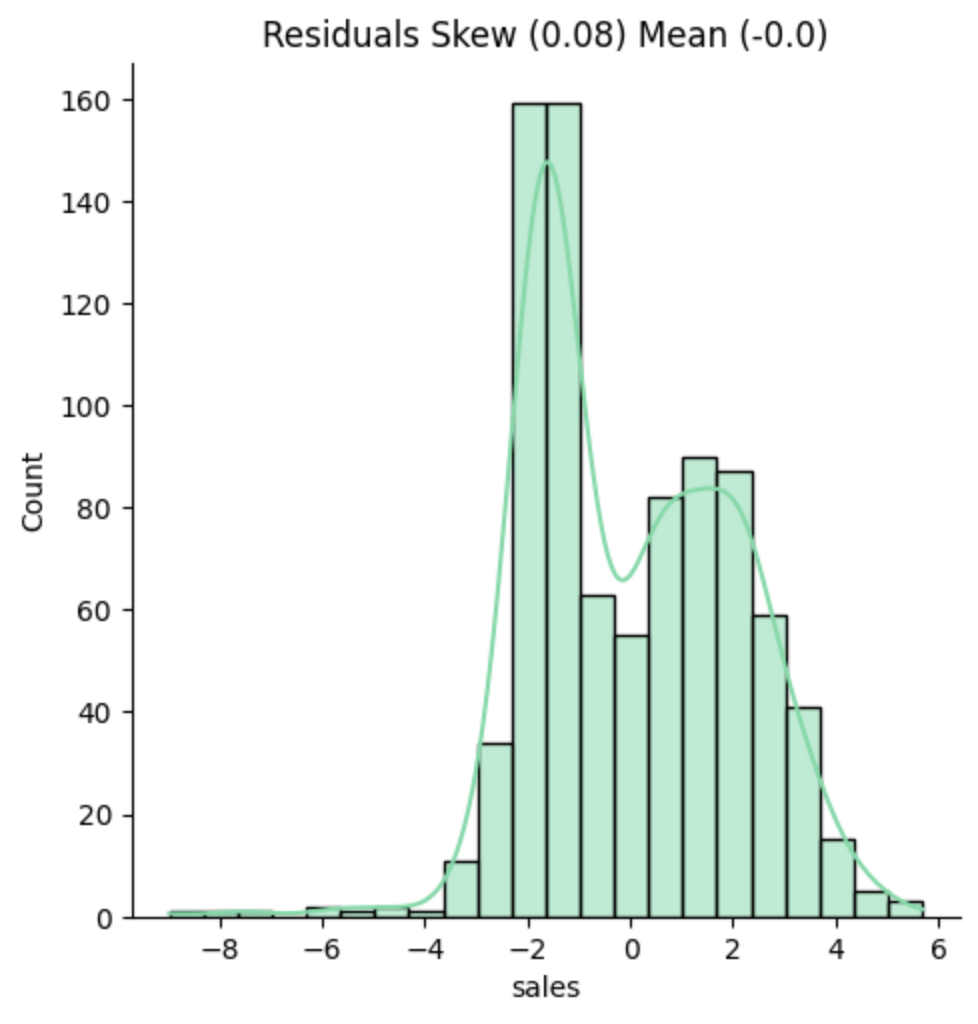

South region Residual Skew:


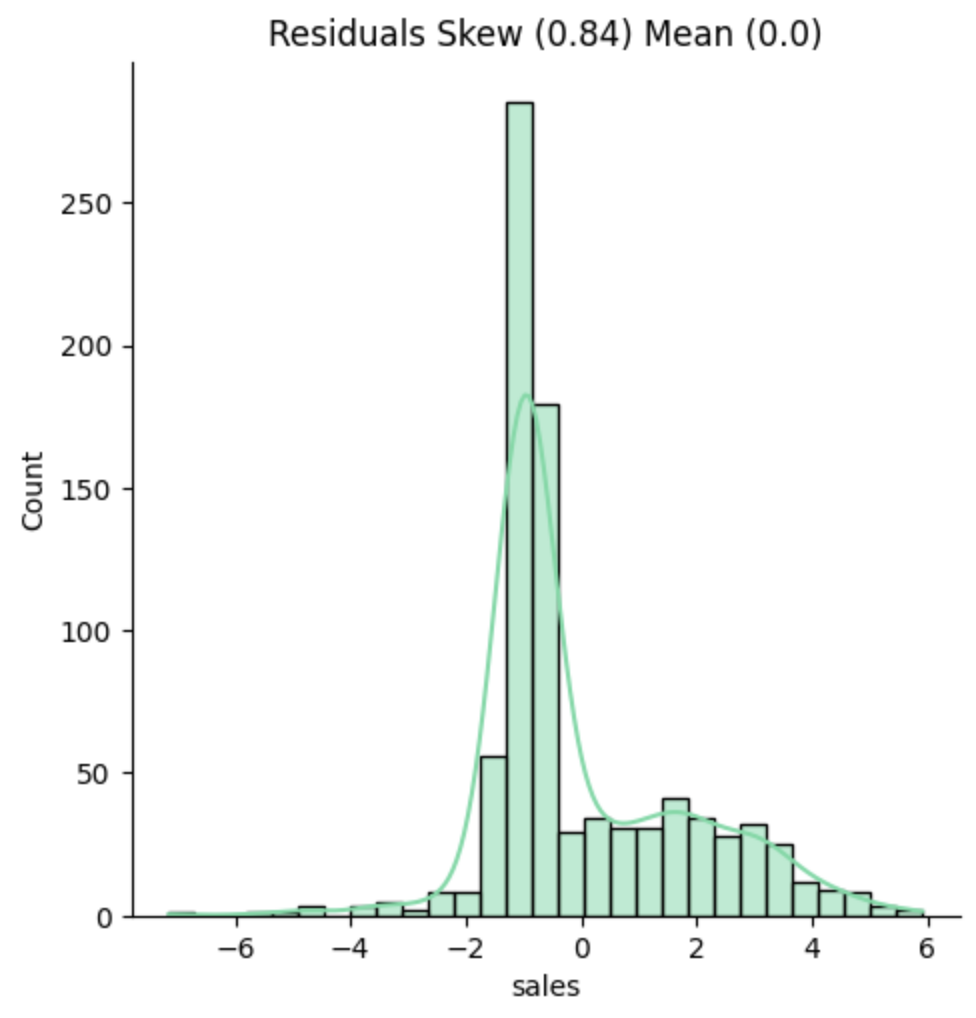

East region Residual Skew:


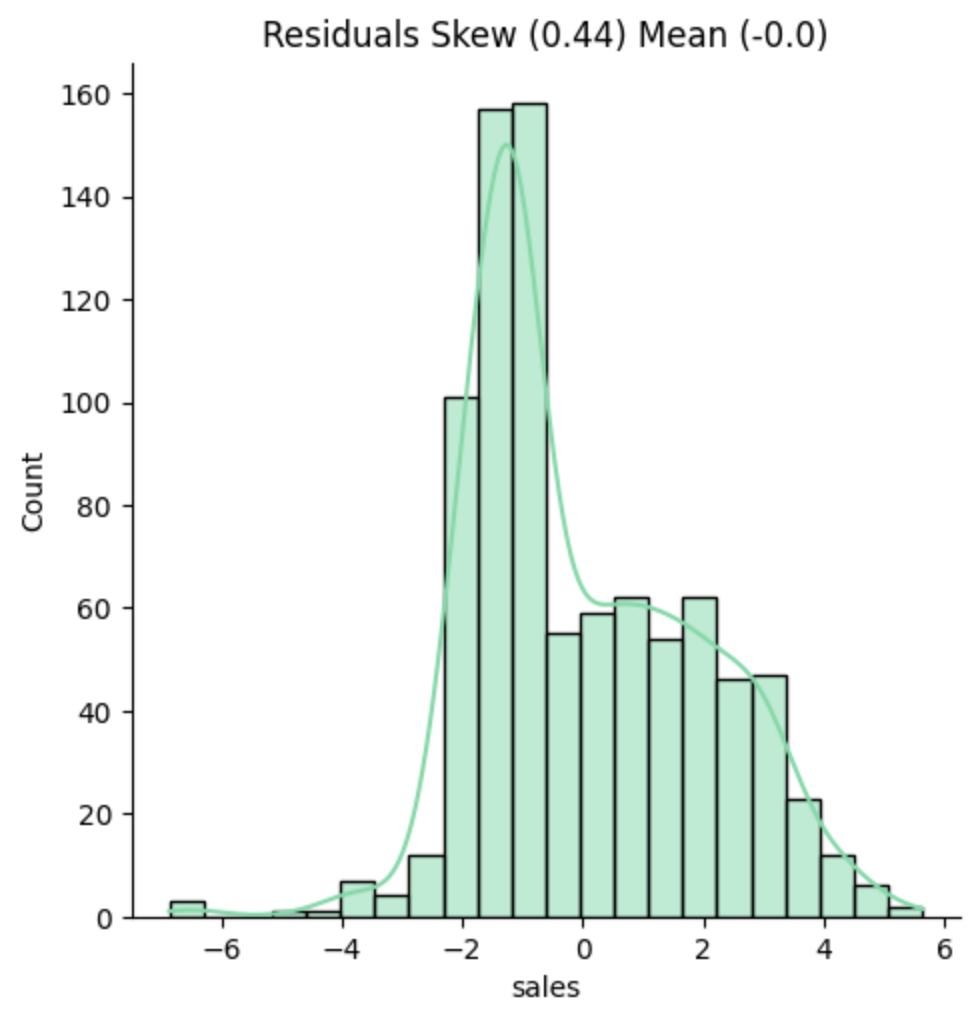

Central region Residual Skew:


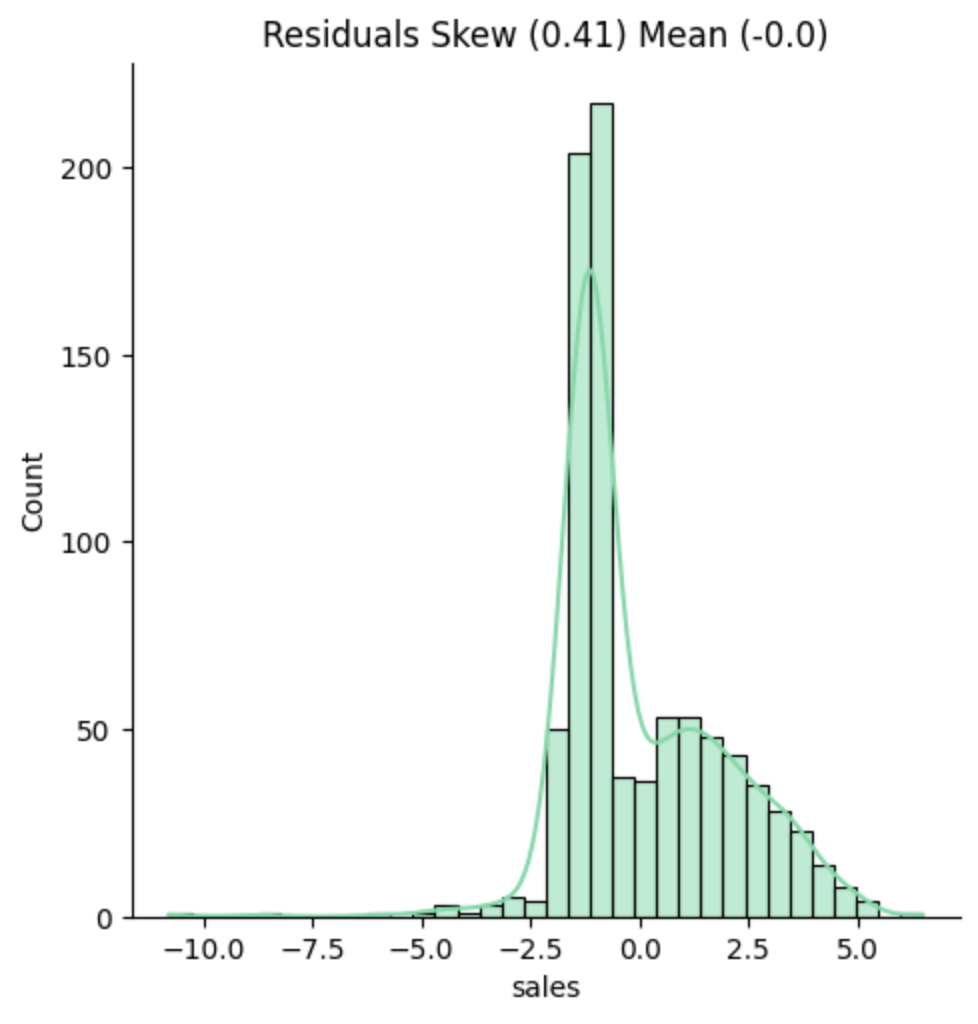

In [ ]:
print('West region Residual Skew:')
display(Image("west_resid_skew.png", width=370, height=350))
print('South region Residual Skew:')
display(Image("south_resid_skew.png", width=370, height=350))
print('East region Residual Skew:')
display(Image("east_resid_skew.png", width=370, height=350))
print('Central region Residual Skew:')
display(Image("central_resid_skew.png", width=370, height=350))

West region Normal Skew:


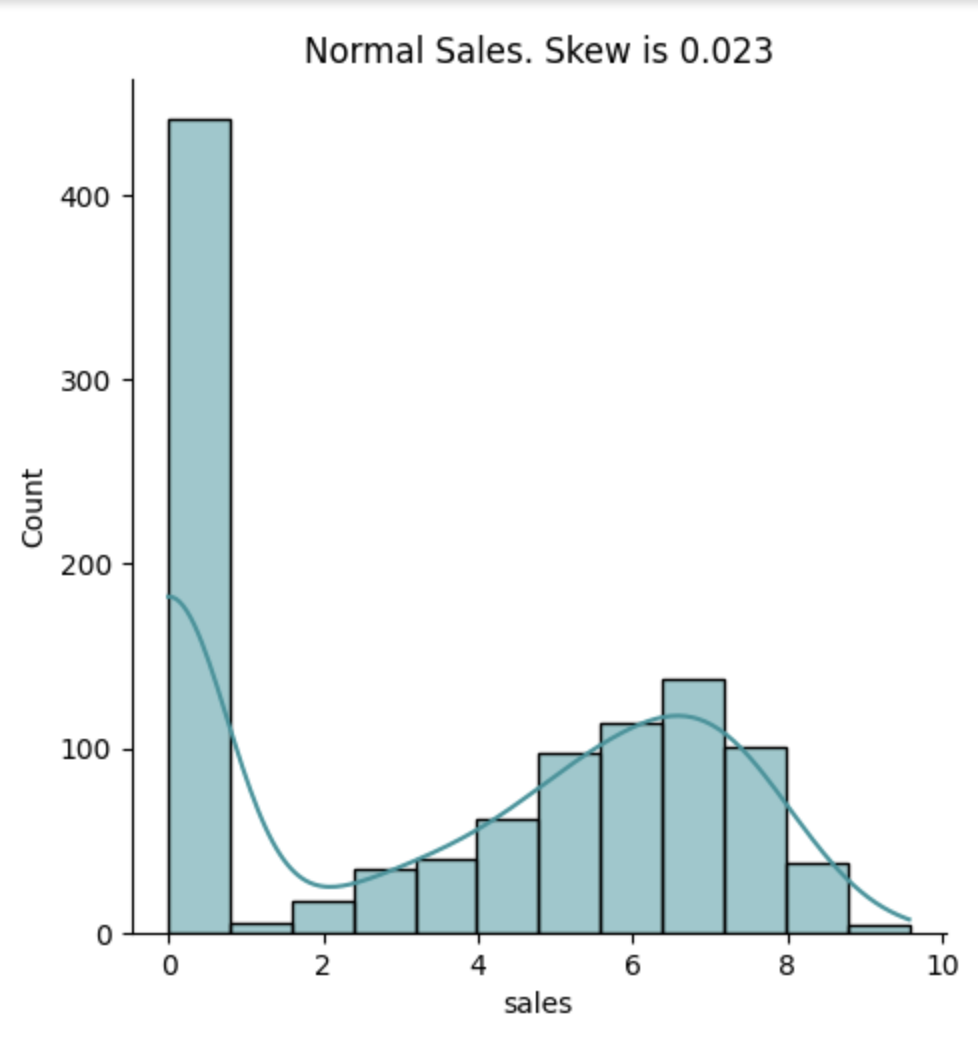

South region Normal Skew:


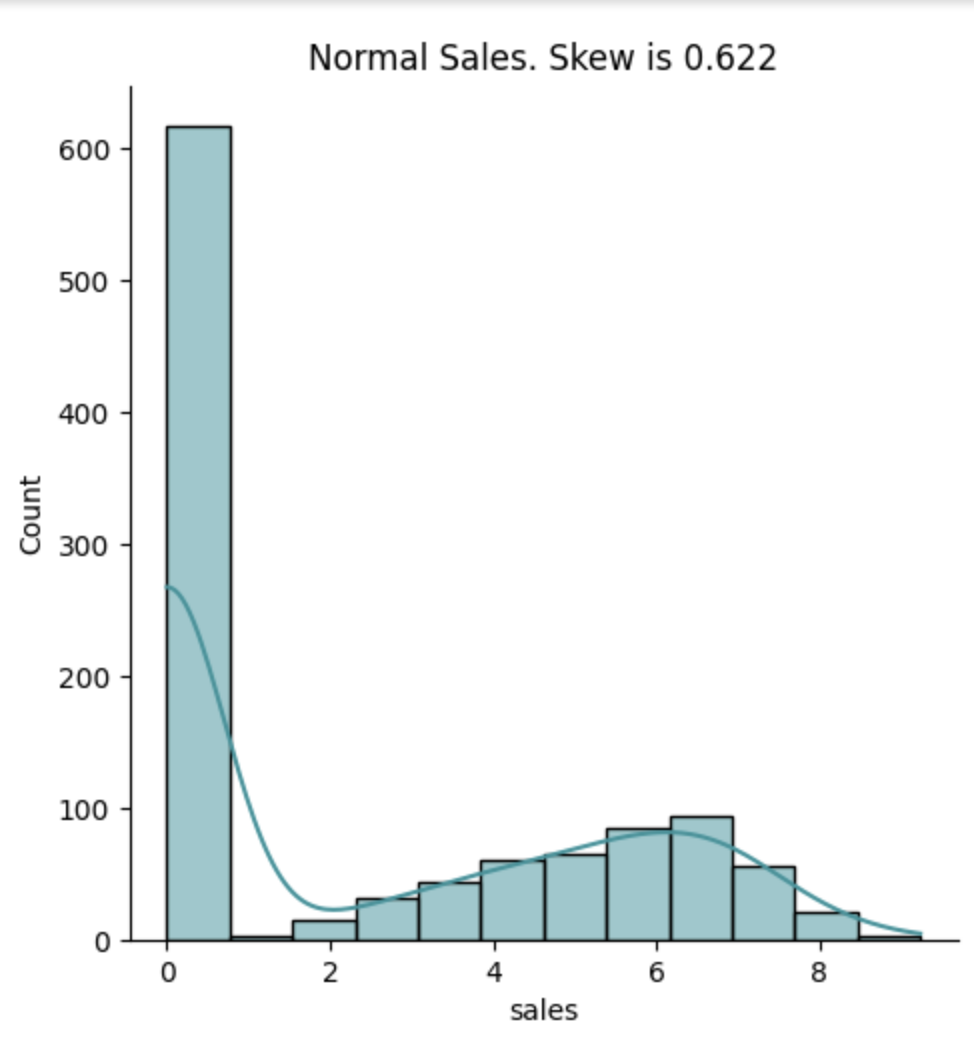

East region Normal Skew:


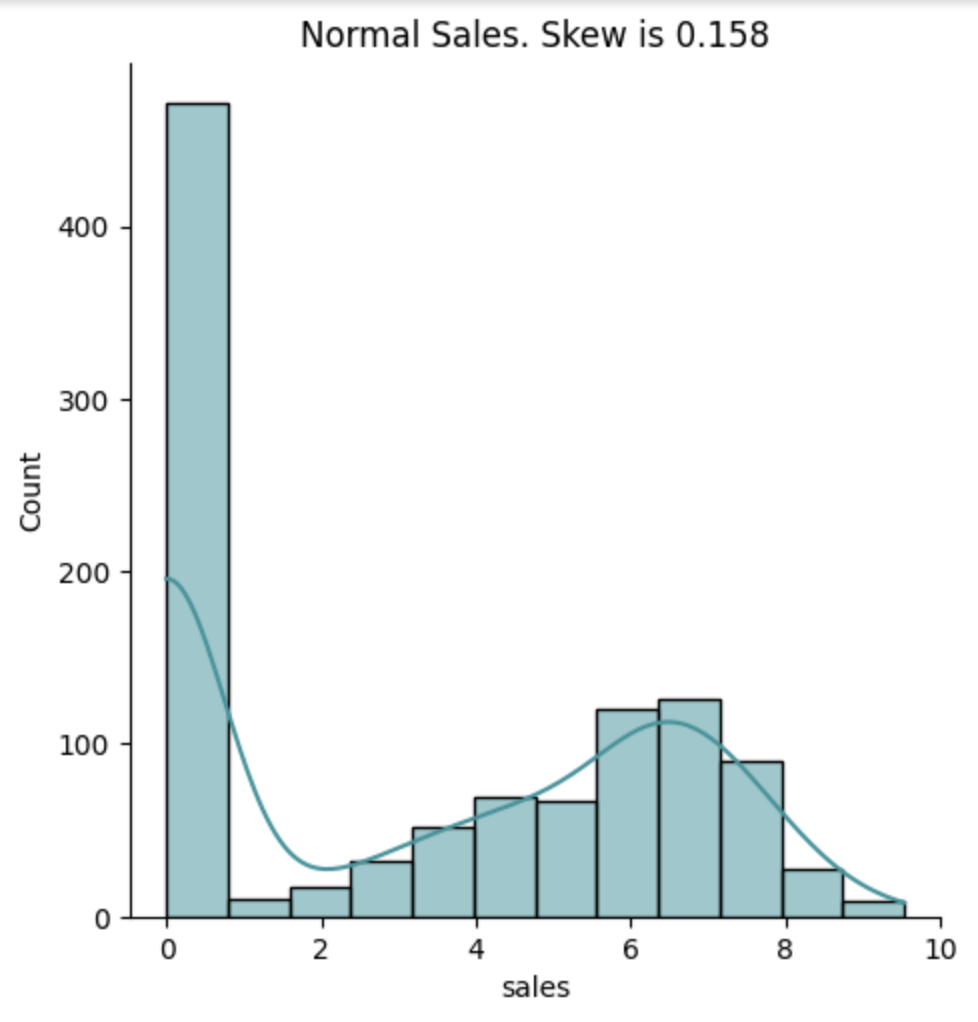

Central region Normal Skew:


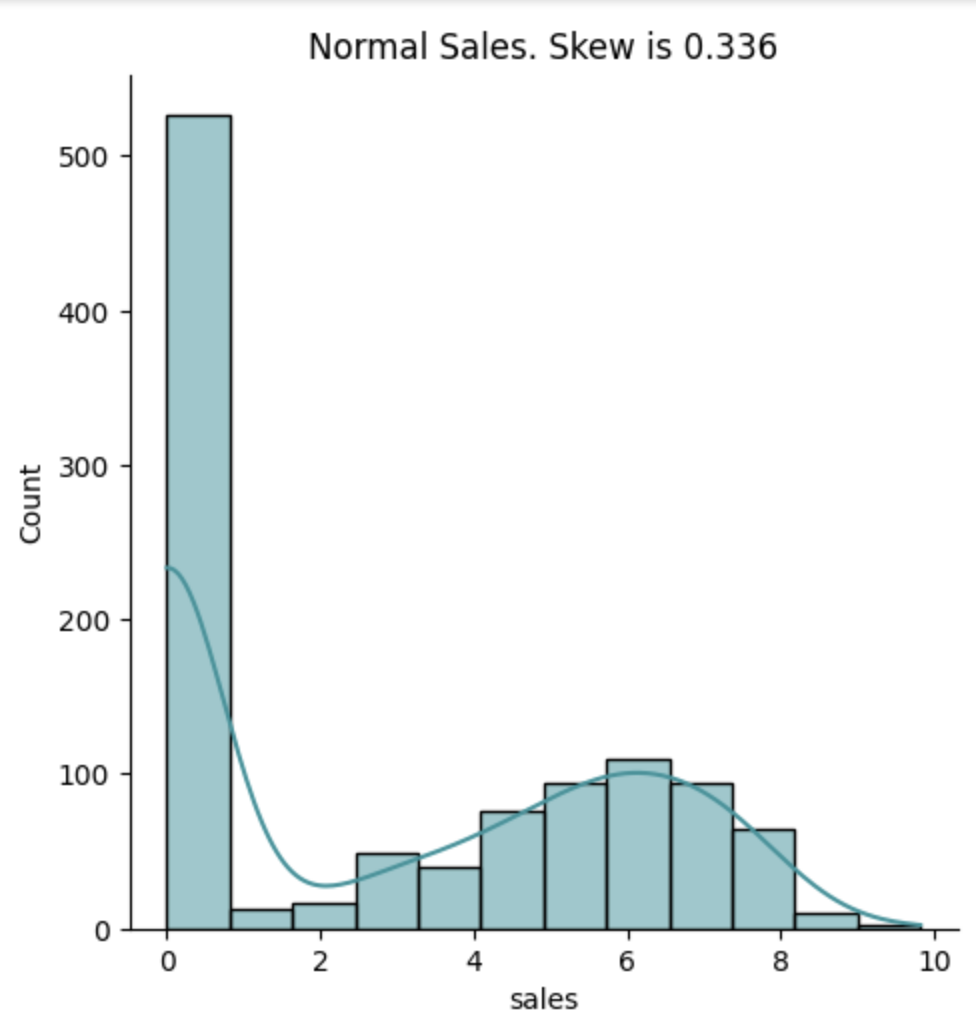

In [ ]:
print('West region Normal Skew:')
display(Image("west_normal_skew.png", width=370, height=350))
print('South region Normal Skew:')
display(Image("south_normal_skew.png", width=370, height=350))
print('East region Normal Skew:')
display(Image("east_normal_skew.png", width=370, height=350))
print('Central region Normal Skew:')
display(Image("central_normal_skew.png", width=370, height=350))

### Compare Actual vs. Predicted Sales
The actual data is the testing data.

In [ ]:
results_df = pd.DataFrame({
    'actual_sales': y_test,
    'predicted_sales': y_test_pred
})

results_df['difference'] = results_df['predicted_sales'] - results_df['actual_sales']
results_df['relative_error'] = results_df['difference'].abs() / results_df['actual_sales']
results_df['relative_error'] = results_df['relative_error'].replace(np.inf, 0)
results_df = results_df.sort_index()
display(results_df.describe())

actual_sales  predicted_sales  difference  relative_error
count        218.00           218.00      218.00          218.00
mean           3.37             3.27       -0.10            0.20
std            3.14             2.28        2.09            0.23
min            0.00             0.41       -4.51            0.00
25%            0.00             1.71       -1.95            0.00
50%            3.79             2.51        0.38            0.10
75%            6.38             4.19        1.61            0.39
max            8.59            12.71        5.64            1.26

#### Results per region:

West region results dataframe:


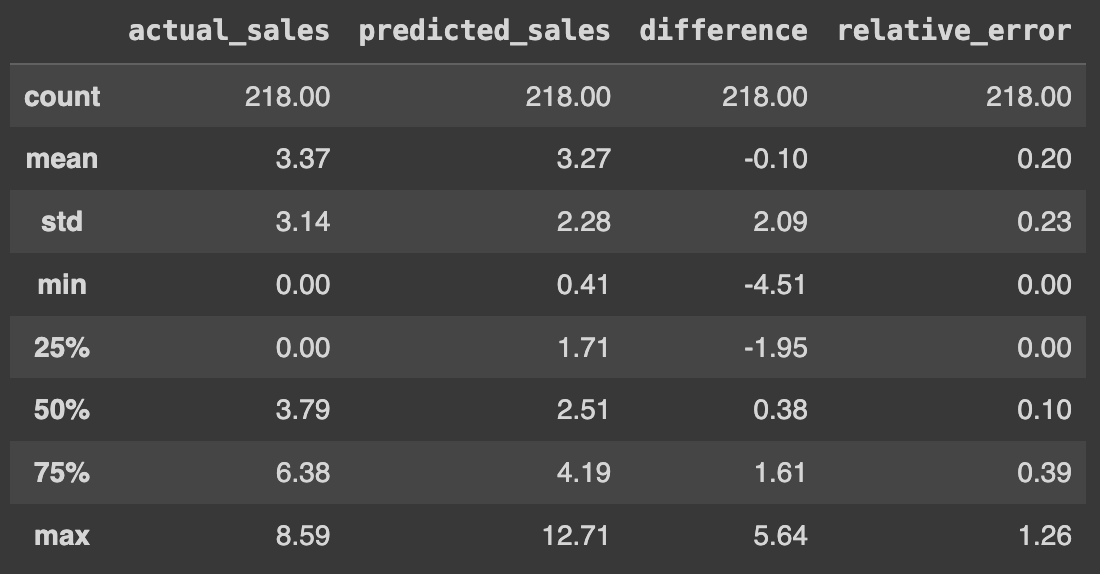

South region results dataframe:


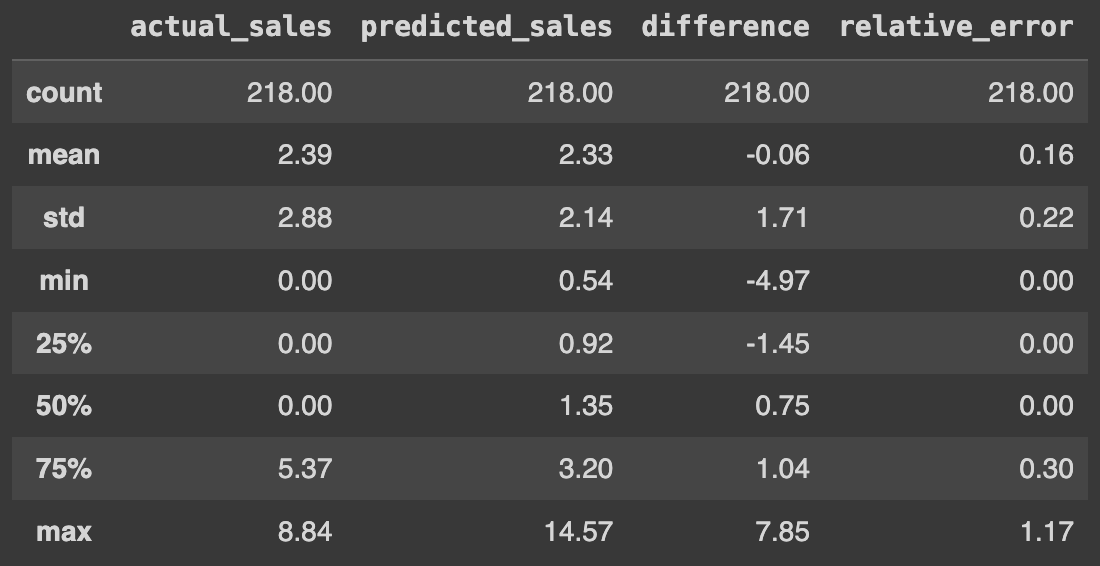

East region results dataframe:


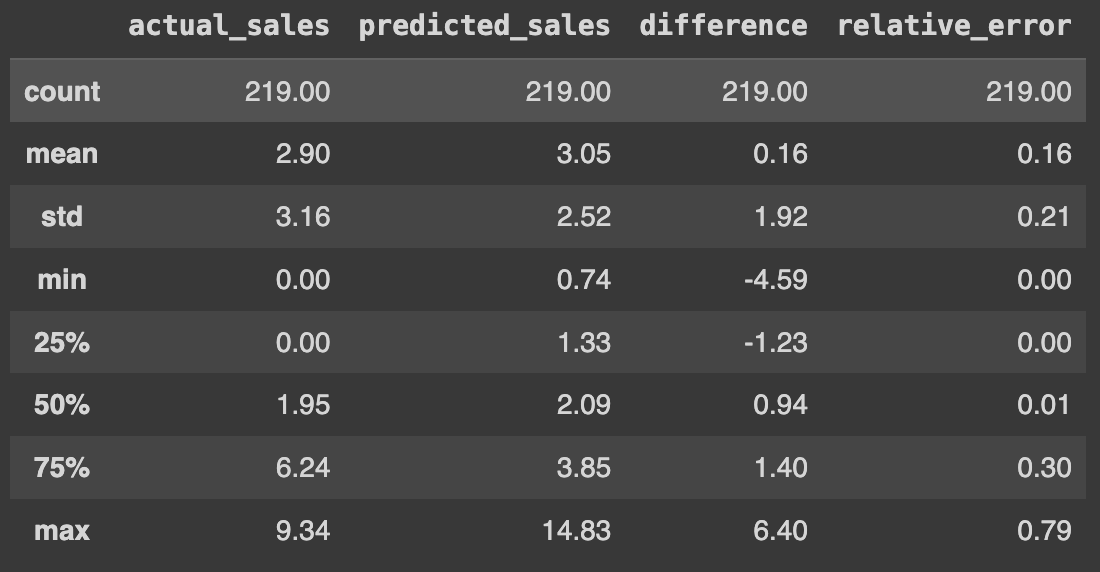

Central region results dataframe:


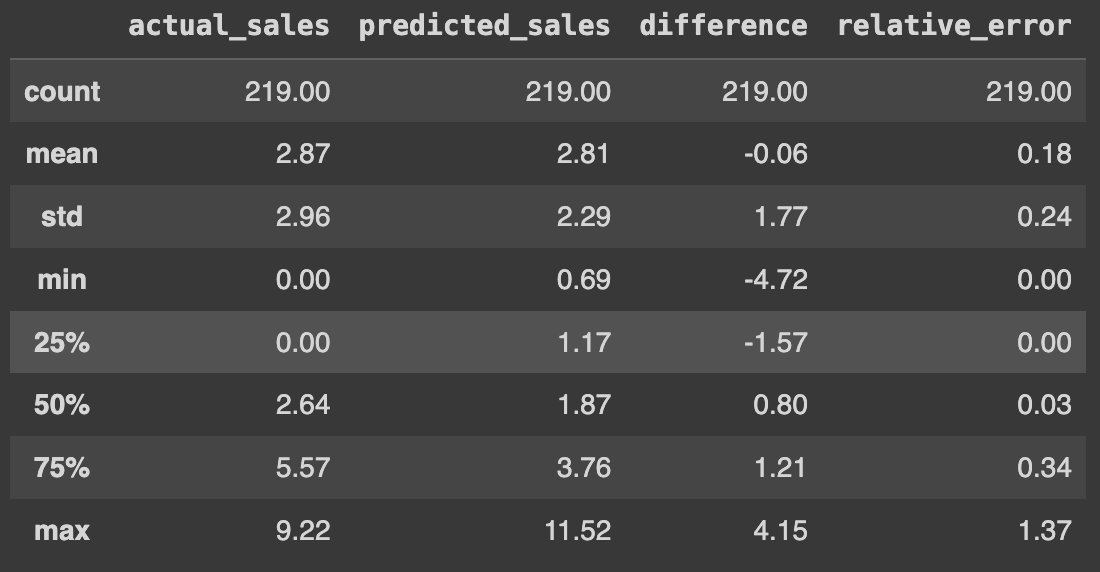

In [ ]:
print('West region results dataframe:')
display(Image("west_df.png", width=450, height=250))
print('South region results dataframe:')
display(Image("south_df.png", width=450, height=250))
print('East region results dataframe:')
display(Image("east_df.png", width=450, height=250))
print('Central region results dataframe:')
display(Image("central_df.png", width=450, height=250))

### Actual vs. Predicted Sale Time Series Graph

In [ ]:
results_df = results_df.resample('2W').sum()

actual_sales = results_df['actual_sales']
predicted_sales = results_df['predicted_sales']
order_date = results_df.index

fig = go.Figure()
fig.add_traces(go.Scatter(x=order_date, y=actual_sales, name='Actual ($)', mode='lines',
                          line=dict(color=discrete_colors[7], width=3)))
fig.add_traces(go.Scatter(x=order_date, y=predicted_sales, name='Predicted ($)', mode='lines',
                          line=dict(color=discrete_colors[8], width=3)))
fig.update_layout(title='Actual vs. Predicted Sales ($)',
                  title_font_size=18,
                  xaxis_title='Order Date',
                  hovermode='x unified')
fig.show()

#### Results per region:

West region:


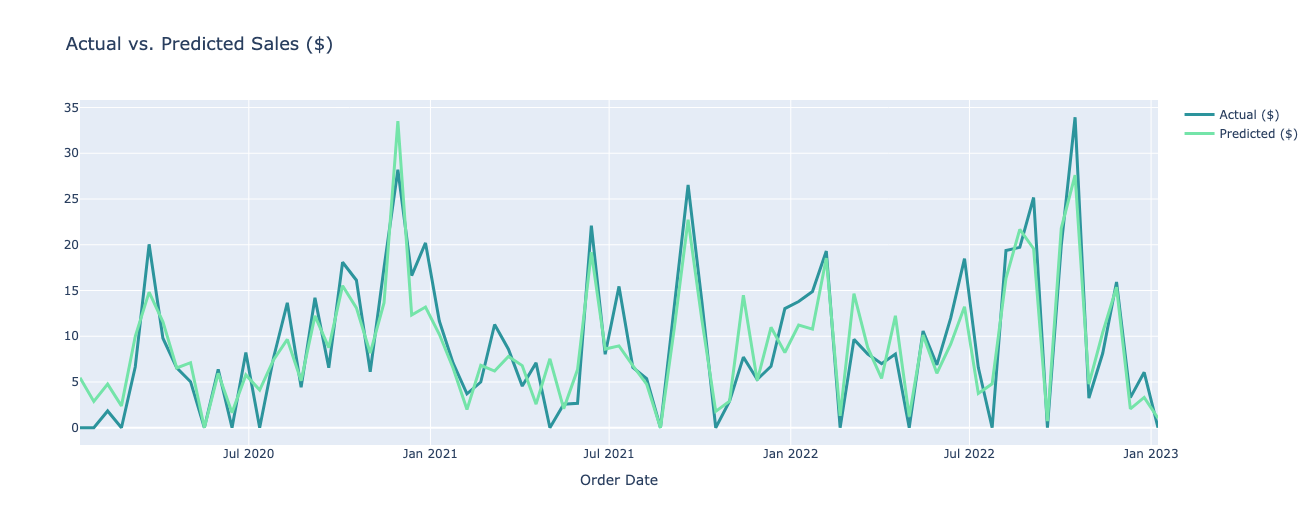

South region:


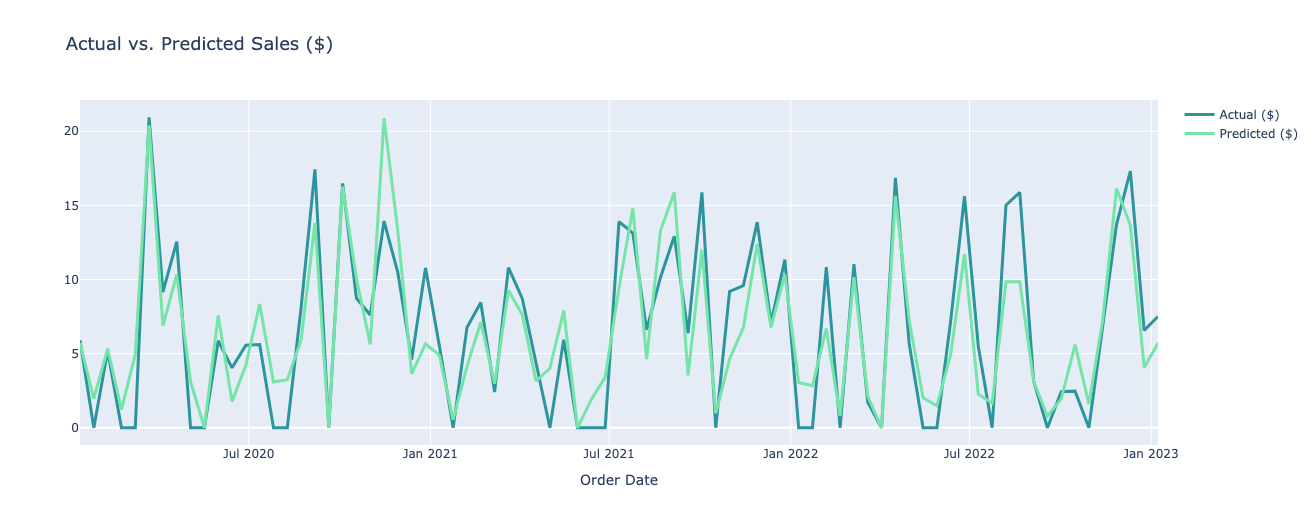

East region:


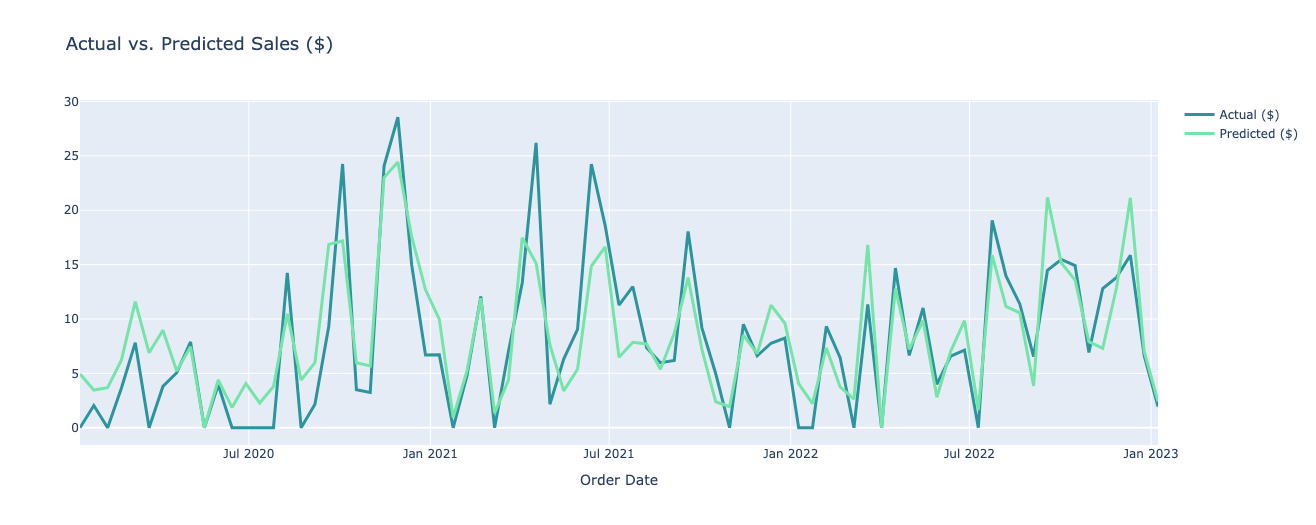

Central region:


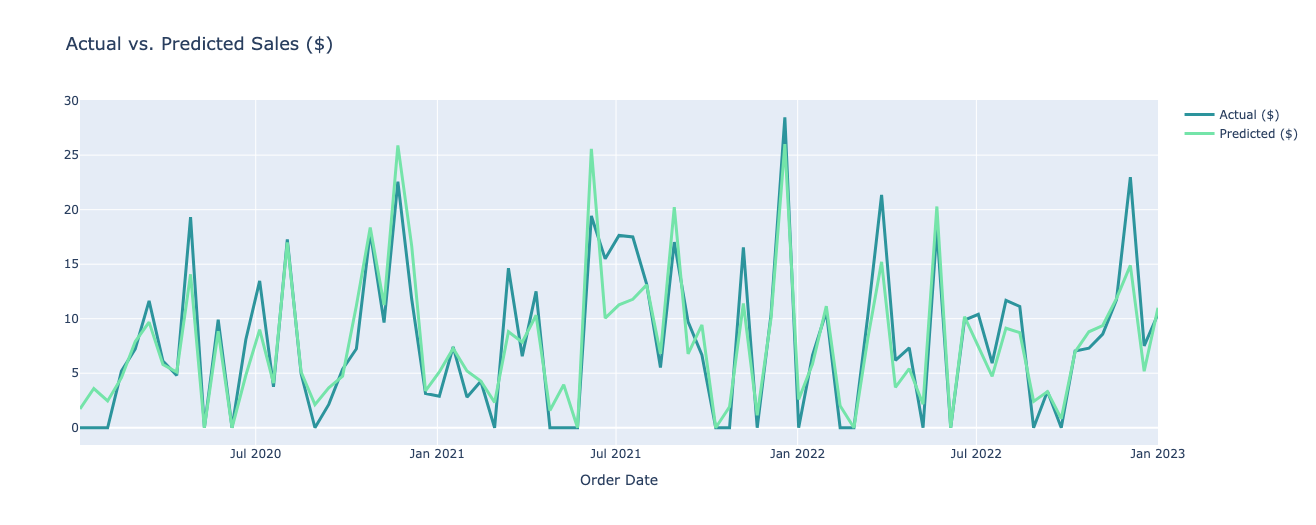

In [ ]:
print('West region:')
display(Image("west_actual_pred_sales.png", width=700, height=300))
print('South region:')
display(Image("south_actual_pred_sales.png", width=700, height=300))
print('East region:')
display(Image("east_actual_pred_sales.png", width=700, height=300))
print('Central region:')
display(Image("central_actual_pred_sales.png", width=700, height=300))

The relative errors are close to zero for all the region models, which means that the predicted sales are relatively close to the actual sales and that the region models are fit to forecast sales. It is further enforced by looking at the actual vs. predicted sales graph. Both lines are almost overlapping.

# Findings

* Sales have a positive relationship with quantities sold for all region models. More items sold lead to higher sales, which is an apparent result.<br><br>

* Using lagging and date features was essential to capture what factors affect regional sales, which means that regional sales are affected by weekly and seasonality patterns. Combining lagging and date features and features originally from the dataset resulted in a better-fit model. The features that made the model overfitting are standalone date and dataset features. These dataset features are customer segments, shipping modes, product categories, and sub-categories. It shows how necessary interaction features are in creating a regional sales forecasting model using this data. The dataset feature not required to be combined with other features is quantities sold. It is apparent in the correlation matrix, where sales only have a relationship with profit and quantities sold. However, this is not true with discounts. There is little to no relationship between sales and discounts under the correlation matrix, but there is in the regression model. It might be because of the use of log(sales).<br><br>

* In the South region model, having higher discounts resulted in lower sales. However, in the East and Central region models, higher discounts mean higher sales.<br><br>

* The West region has the highest sales, followed by the East, Central, and South regions.<br><br>

* The customer segment with the highest sales is Consumer, followed by Corporate and Home Office.<br><br>

* The shipping mode with the highest sales is Standard class, followed by Second class, First class, and Same day delivery. There is a huge gap in sales between the Standard class and the other shipping modes.<br><br>

* The technology product category has the most sales, and its sub-category, phones, has the most sales among all the sub-categories. The top 5 sub-categories are phones, chairs, storage, tables, and binders.<br><br>

* There are a few months where the profit doesn't increase or decrease based on sales. Relatively, profit increases and decreases the same with sales, however, there are no spikes in increases in profit compared to sales. From August 2022, the profit stagnated compared to sales.<br><br>

# Recommendation

The code to create the model needs more tweaking. Having less code in ridge regression to find the best combination of interaction features is better. The analyst has limited knowledge of more advanced machine learning models. A better model can be used to create a sales forecasting model, perhaps with AutoRegressive Integrated Moving Average (ARIMA) or Long Short-Term Memory (LSTM).

If the target is to find relationships between sales and other factors like shipping, categories, and customer segments, then it will be better to have more data.

Overall, the model is successful in forecasting sales. The actual sales are close to or equal to the predicted sales generated from the model. Note that the actual sales were the testing data sales values, which is 20% of overall sales data. All the regional sales model has more than 50% r-squared, low root mean square error (RMSE), features with less than 5 variance inflation factor (VIF), and residual skew of close to zero.

In using the model, it is best to have yearly historical data for the best result since the lagging and date features are key features used in the model.